**Заголовок:** Разработка моделей для для HR-аналитики компании «Работа с заботой».

**Описание проекта:**
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник. Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

**Цель исследования:** 

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Ход исследования:**

- Загрузка и изучение общей информации из предоставленных датасетов.
- Предобработка данных: проверка данных на наличие пропусков и дубликатов. Проверка корректности типов данных у каждого признака. 
- Исследовательский анализ данных: проведение исследовательского анализа данных для их подготовки; проведение корреляционного анализа признаков в датасете. Дополнительно для второй задачи: составление портрета «уволившегося сотрудника» и проверка утверждения аналитиков о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. 
- Подготовка пайплайнов: обработка в пайплайне количественных и категориальных признаков; обучение моделей; выбор лучшей модели; оценка важности признаков для лучшей модели с помощью метода SHAP. 
- Промежуточные выводы о лучших моделях и их решении.


**Общий вывод:** обобщение выводов о проделанной работе в ходе исследования.

**Содержание:**

**[Задача 1: предсказание уровня удовлетворённости сотрудника](#one_id)**

**[1. Загрузка данных](#two_id)**

**[2. Предобработка данных](#three_id)**

**[3. Исследовательский анализ данных](#four_id)**

**[4. Корреляционный анализ](#five_id)**

**[5. Подготовка пайплайнов и выбор лучшей модели](#six_id)**

**[Задача 2: предсказание увольнения сотрудника из компании](#seven_id)**

**[1. Загрузка данных](#eight_id)**

**[2. Предобработка данных](#nine_id)**

**[3. Исследовательский анализ данных](#ten_id)**

**[4. Корреляционный анализ](#eleven_id)**

**[5. Подготовка пайплайнов и выбор лучшей модели](#twelve_id)**

**[Общий вывод](#thirteen_id)**

<a id='one_id'></a>
## Первая задача: предсказание уровня удовлетворённости сотрудника

<a id='two_id'></a>
### Загрузка данных

Загрузим все необходимы для работы библиотеки, классы, функции.

In [1]:
# Установим библиотеки:

# phik для расчета корреляции
!pip install phik -q

# shap для для анализа SHAP-значений
!pip install shap -q

# Установим актуальную версию версию matplotlib 
!pip install -U matplotlib -q

# Установим актуальную версию версию seaborn 
!pip install -U seaborn -q

# Установим актуальную версию библиотеки sklearn
!pip install -U scikit-learn -q

In [2]:
# Импортируем библиотеку pandas для работы с датафреймом
import pandas as pd

# Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import matplotlib.pyplot as plt

# Импортируем библиотеку seaborn для построения графиков
import seaborn as sns

# Импортируем библиотеку numpy  для математических операций 
import numpy as np

# Импортируем модуль scipy.stats для работы с вероятностями и статистическими тестами
from scipy import stats as st

# Импортируем функцию cross_val_predict для кросс-валидации
from sklearn.model_selection import cross_val_predict

# Импортируем библиотеку phik для расчета корреляции
import phik

# Импортируем класс pipeline для работы с пайплайнами
from sklearn.pipeline import Pipeline

# Импортируем класс ColumnTransformer для работы с данными разного типа в одном наборе
from sklearn.compose import ColumnTransformer

# Импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV

# Импортируем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# Импортируем: 
# класс StandardScaler для стандартизации данных
# класс MinMaxScaler для нормализации данных
# класс OneHotEncoder для кодирования данных
# класс OrdinalEncoder для кодирования порядковых данных
# класс LabelEncoder для кодирования целевого признака
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# Импортируем:
# класс LogisticRegression для логистической регрессии и LinearRegression для линейной регрессии
# класс KNeighborsClassifier для k ближайших соседей
# класс DecisionTreeClassifier и DecisionTreeRegressor для дерева решений
# класс DummyClassifier константная модель
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

# Импортируем функцию shap для анализа SHAP-значений
import shap

# Импортируем метрики
from sklearn.metrics import roc_auc_score, recall_score, precision_score, confusion_matrix, make_scorer

import warnings
warnings.filterwarnings('ignore')

Загрузим данные в датафреймы `pandas`. 

In [3]:
# Поместим датасет train_job_satisfaction_rate.csv в переменную train_rate
train_rate = pd.read_csv('/Users/eduardgorbacev/Desktop/Project_Yandex/Project_8/train_job_satisfaction_rate.csv')

# Поместим датасет test_features.csv в переменную features
features = pd.read_csv('/Users/eduardgorbacev/Desktop/Project_Yandex/Project_8/test_features.csv')

# Поместим датасет test_target_job_satisfaction_rate.csv в переменную target_rate
target_rate = pd.read_csv('/Users/eduardgorbacev/Desktop/Project_Yandex/Project_8/test_target_job_satisfaction_rate.csv')

In [4]:
# Напишем собственную функцию, которая будет выводить информацию о датасете и случайные 5 строк
def info_data(data):
    try:
        info_result = data.info()
        sample_result = data.sample(5)
        return info_result, display(sample_result)
    
    except:
        print('Информация недоступна, проверьте датасет')

**Рассмотрим датасет `train_rate`**

In [5]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(train_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
68,655288,sales,middle,medium,7,no,no,4,43200,0.79
3097,187337,sales,middle,medium,2,no,no,4,43200,0.66
938,796509,sales,junior,low,2,no,no,4,18000,0.80
2819,217322,sales,junior,high,2,no,no,4,31200,0.68
2961,404321,sales,junior,medium,4,no,no,4,28800,0.93


(None, None)

Датасет `train_rate` содержит следующие даные о сотрудниках:

- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, **целевой признак**.

Итак, данные в таблице соответствуют описанию. Наименования столбцов соответсвуют стандартам оформления данных. Столбцы с типом данных `object` следует привести к типу `category`, так как они содержат категориальные типы данных, а преобразование ускорит последующую работу с данными. Столбец `id` следует сделать индексным, т.к. он содержит уникальный идентификатор сотрудника, а это по факту случайный набор символов и любые зависимости с целевым признаком будут случайными. Целевой признак `job_satisfaction_rate` имеет непрерывные данные, значит нам предстоит решить задачу регрессии.

**Рассмотрим датасет `features`**

In [6]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
458,161234,sales,junior,low,1,no,no,5,15600
1823,702222,sales,junior,medium,1,no,no,4,21600
898,304624,technology,middle,low,4,no,no,4,34800
336,307112,sales,junior,high,1,no,no,4,33600
477,692501,marketing,sinior,medium,8,no,no,3,54000


(None, None)

Итак, датасет `features` содержит аналогичные данные, что и датасет `train_rate`, за исключением столбца `job_satisfaction_rate` - это целевой признак, который нам нужно будет предсказать. Датасет `features` является нашей тестовой выборкой, на которой наша модель предскажет целевой признак. Данные в таблице соответствуют описанию. Наименования столбцов соответствуют стандартам оформления данных. Столбцы с типом данных `object` следует привести к типу `category`, так как они содержат категориальные типы данных, а преобразование ускорит последующую работу с данными. Столбец `id` следует сделать индексным.

**Рассмотрим датасет `target_rate`**

In [7]:
info_data(target_rate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
1479,300475,0.11
1375,536865,0.10
1498,830439,0.75
1271,691281,0.85
109,862904,0.34


(None, None)

Итак, датасет `target_rate` содержит целевой признак `job_satisfaction_rate` - уровень удовлетворённости сотрудника работой в компании, который необходим нам для расчета метрик модели при предсказаниях на тестовой выборке (датасет `features`). Данные в таблице соответствуют описанию. Наименования столбцов соответствуют стандартам оформления данных. Столбец `id` следует сделать индексным.

**Промежуточный вывод:**

Мы изучили данные в датасетах: 

- `train_rate` - является тренировочной выборкой с целевым признаком `job_satisfaction_rate`. Содержит данные о сотрудниках. Данный датасет необходим для обучения модели. 
- `features` -  является тестовой выборкой, на которой наша модель предскажет целевой признак. Содержит аналогичные данные, что и датасет `train_rate`, за исключением столбца с целевым признаком.
- `target_rate` - содержит целевой признак `job_satisfaction_rate` (уровень удовлетворённости сотрудника работой в компании) тестовой выборки `features` и необходим для расчета метрик модели при предсказаниях на тестовой выборке. Имеет непрерывные данные, нам предстоит решить задачу регрессии.

На этапе предобработки данных столбцы с типом данных `object` следует привести к типу `category`, а столбец `id` следует сделать индексным.


<a id='three_id'></a>
### Предобработка данных

#### Проведем предобработку данных датасета `train_rate`

In [8]:
# Напишем собственную функцию, которая будет выводить информацию 
# о пропусках, описательную статистику, явные дубликаты
def describe_data(data):
    try:
        missed_result = pd.DataFrame(data.isna().sum()).style.background_gradient('coolwarm')
        describe_result = round(data.describe().T, 2)
        duplicated_result = data[data.duplicated()]
        return display(missed_result, describe_result, duplicated_result)
    except:
        print: 'Информация недоступна, проверьте датасет'

In [9]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(train_rate)

,0
id,0
dept,6
level,4
workload,0
employment_years,0
last_year_promo,0
last_year_violations,0
supervisor_evaluation,0
salary,0
job_satisfaction_rate,0


,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.62,257883.10,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.72,2.54,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.48,1.01,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.70,14900.70,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.53,0.23,0.03,0.36,0.56,0.71,1.0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate


In [10]:
# Проверим датасет на наличие неявных дубликатов по столбцу "id"
print(f'Кол-во дубликатов по столбцу id: {train_rate["id"].duplicated().sum()}')

Кол-во дубликатов по столбцу id: 0


Итак, в датасете <code>train_rate</code> отсутствуют явные и неявные (по столбцу `id`) дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. Имеются пропуски в столбцах `dept` (отдел, в котором работает сотрудник) и `level` (уровень занимаемой должности).

In [11]:
# Выведем строки с пропусками
train_rate[train_rate.isna().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


Данные пропуски заполним в пайпланах самым часто встречающимся значением в соответствующих столбцах. Эту же стратегию будем применять для всех категориальных столбцов на случай, если в будущих датасетах будут иметься пропуски и наш пайплайн смог отработать без ошибок. 

In [12]:
# Сделаем столбец id индексным
train_rate = train_rate.set_index('id')

In [13]:
# Преобразуем данные с типом "object" в "category"
columns_category = train_rate.select_dtypes(include='object').columns

for column in columns_category:
    train_rate[column] = train_rate[column].astype('category')

In [14]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(train_rate)

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   3994 non-null   category
 1   level                  3996 non-null   category
 2   workload               4000 non-null   category
 3   employment_years       4000 non-null   int64   
 4   last_year_promo        4000 non-null   category
 5   last_year_violations   4000 non-null   category
 6   supervisor_evaluation  4000 non-null   int64   
 7   salary                 4000 non-null   int64   
 8   job_satisfaction_rate  4000 non-null   float64 
dtypes: category(5), float64(1), int64(3)
memory usage: 176.5 KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
492268,purchasing,junior,medium,3,no,no,4,21600,0.68
278727,technology,middle,medium,6,no,no,5,45600,0.88
743396,technology,junior,low,3,no,no,5,15600,0.70
712099,technology,junior,medium,1,no,no,5,27600,0.51
908796,sales,middle,high,7,no,no,3,45600,0.35


(None, None)

Столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Проверим уникальные значения во всех категориальных столбцах.

In [15]:
# Выведем уникальные значения категориальных столбцов
for column in columns_category:
    print(f'Уникальные значения в столбце {column}: {train_rate[column].unique()}')

Уникальные значения в столбце dept: ['sales', 'hr', 'technology', 'purchasing', 'marketing', NaN]
Categories (5, object): ['hr', 'marketing', 'purchasing', 'sales', 'technology']
Уникальные значения в столбце level: ['junior', 'middle', 'sinior', NaN]
Categories (3, object): ['junior', 'middle', 'sinior']
Уникальные значения в столбце workload: ['medium', 'high', 'low']
Categories (3, object): ['high', 'low', 'medium']
Уникальные значения в столбце last_year_promo: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Уникальные значения в столбце last_year_violations: ['no', 'yes']
Categories (2, object): ['no', 'yes']


В слове `sinior` допущена грамматическая ошибка, заменим `sinior` на `senior`. Пропуски будут обработаны в пайплайнах. 

In [16]:
# Заменим значение sinior на senior
train_rate['level'] = train_rate['level'].replace('sinior', 'senior')

#### Проведем предобработку данных датасета `features`

In [17]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(features)

,0
id,0
dept,2
level,1
workload,0
employment_years,0
last_year_promo,0
last_year_violations,0
supervisor_evaluation,0
salary,0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21,253851.33,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.67,2.54,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.53,1.00,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.80,15398.44,12000.0,22800.0,30000.0,43200.00,96000.0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


In [18]:
# Проверим датасет на наличие неявных дубликатов по столбцу "id"
print(f'Кол-во дубликатов по столбцу id: {features["id"].duplicated().sum()}')

Кол-во дубликатов по столбцу id: 0


Итак, в датасете <code>features</code> отсутствуют явные и неявные (по столбцу `id`) дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. Имеются пропуски в столбцах `dept` (отдел, в котором работает сотрудник) и `level` (уровень занимаемой должности) - пропуски заполним в пайпланах самым часто встречающимся значением в соответствующих столбцах. 

In [19]:
# Сделаем столбец id индексным
features = features.set_index('id')

In [20]:
# Преобразуем данные с типом "object" в "category"
for column in columns_category:
    features[column] = features[column].astype('category')

In [21]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(features)

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   1998 non-null   category
 1   level                  1999 non-null   category
 2   workload               2000 non-null   category
 3   employment_years       2000 non-null   int64   
 4   last_year_promo        2000 non-null   category
 5   last_year_violations   2000 non-null   category
 6   supervisor_evaluation  2000 non-null   int64   
 7   salary                 2000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 73.1 KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
466840,purchasing,sinior,high,10,no,no,5,66000
628038,technology,sinior,medium,4,no,no,4,72000
923415,sales,junior,low,2,no,no,3,15600
467458,sales,middle,low,5,no,no,4,19200
580987,sales,junior,medium,3,no,no,4,21600


(None, None)

Столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Проверим уникальные значения во всех категориальных столбцах.

In [22]:
# Выведем уникальные значения категориальных столбцов
for column in columns_category:
    print(f'Уникальные значения в столбце {column}: {features[column].unique()}')

Уникальные значения в столбце dept: ['marketing', 'hr', 'sales', 'purchasing', 'technology', NaN, ' ']
Categories (6, object): [' ', 'hr', 'marketing', 'purchasing', 'sales', 'technology']
Уникальные значения в столбце level: ['junior', 'middle', 'sinior', NaN]
Categories (3, object): ['junior', 'middle', 'sinior']
Уникальные значения в столбце workload: ['medium', 'low', 'high', ' ']
Categories (4, object): [' ', 'high', 'low', 'medium']
Уникальные значения в столбце last_year_promo: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Уникальные значения в столбце last_year_violations: ['no', 'yes']
Categories (2, object): ['no', 'yes']


Итак, столбцы `dept` и `workload` имеют ячейки со строковым пробелом `' '`, из-за чего появляется дополнительная ложная категория, поэтому заменим данное значение на `NaN`, чтобы в пайплайнах обработать пропуски. А в слове `sinior` допущена грамматическая ошибка, заменим `sinior` на `senior`.

In [23]:
# Заменим значение с пустой ячейкой на NaN
features[['dept', 'workload']] = features[['dept', 'workload']].replace(' ', np.nan)
features['level'] = features['level'].replace('sinior', 'senior')

In [24]:
# Выведем уникальные значения категориальных столбцов
for column in columns_category:
    print(f'Уникальные значения в столбце {column}: {features[column].unique()}')

Уникальные значения в столбце dept: ['marketing', 'hr', 'sales', 'purchasing', 'technology', NaN]
Categories (5, object): ['hr', 'marketing', 'purchasing', 'sales', 'technology']
Уникальные значения в столбце level: ['junior', 'middle', 'senior', NaN]
Categories (3, object): ['junior', 'middle', 'senior']
Уникальные значения в столбце workload: ['medium', 'low', 'high', NaN]
Categories (3, object): ['high', 'low', 'medium']
Уникальные значения в столбце last_year_promo: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Уникальные значения в столбце last_year_violations: ['no', 'yes']
Categories (2, object): ['no', 'yes']


In [25]:
# Проверим кол-во пропусков
pd.DataFrame(features.isna().sum()).style.background_gradient('coolwarm')

,0
dept,3
level,1
workload,1
employment_years,0
last_year_promo,0
last_year_violations,0
supervisor_evaluation,0
salary,0


Ячейки с пробелами успешно заменены на `NaN`. Все остальные данные в столбцах верны, орфографических ошибок нет, кол-во категорий соответствует кол-ву уникальных значений соответствующих столбцов. Пропуски будут обработаны в пайплайнах. 

#### Проведем предобработку данных датасета `target_rate`

In [26]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(target_rate)

,0
id,0
job_satisfaction_rate,0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21,253851.33,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.55,0.22,0.03,0.38,0.58,0.72,1.0


,id,job_satisfaction_rate


In [27]:
# Проверим датасет на наличие неявных дубликатов по столбцу "id"
print(f'Кол-во дубликатов по столбцу id: {target_rate["id"].duplicated().sum()}')

Кол-во дубликатов по столбцу id: 0


Итак, в датасете <code>target_rate</code> отсутствуют явные и неявные (по столбцу `id`) дубликаты и пропуски. Аномальных значений и выбросов в целевом признаке `job_satisfaction_rate` не обнаружено.

In [28]:
# Сделаем столбец id индексным
target_rate = target_rate.set_index('id')

#### Промежуточный вывод:

- Столбец `id` преобразован в индексный. Столбцы с типом данных `object` привели к типу `category`. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`.


- В датасете `features` отсутствуют явные и неявные (по столбцу `id`) дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. Пропуски заполним в пайпланах самым часто встречающимся значением в соответствующих столбцах. Столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Пустые ячейки (строка с пробелом) в столбцах `dept` и `workload` заменены на `NaN`, чтобы в пайплайнах была возможность обработать эти пропуски. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`.


- В датасете `target_rate` отсутствуют явные и неявные (по столбцу `id`) дубликаты и пропуски. Столбец `id` преобразован в индексный. Аномальных значений и выбросов в целевом признаке `job_satisfaction_rate` не обнаружено.

<a id='four_id'></a>
### Исследовательский анализ данных

In [29]:
# Напишем собственную функцию, которая будет строит круговые диаграммы для категориальных признаков
def object_pie(data, column):
    try:
        data.groupby(column)[column].count().plot(
            kind='pie', 
            ylabel='', 
            autopct='%.0f%%', 
            figsize=(7,7), 
            fontsize=14), 
        plt.title(f'Соотношение признаков в столбце {column}', fontsize=18);
    except:
        print ('График недоступен, проверьте вводимые данные')

#### Проведем исследовательский анализ данных датасета `train_rate`

Рассмотрим категориальный признак `dept` — отдел, в котором работает сотрудник.

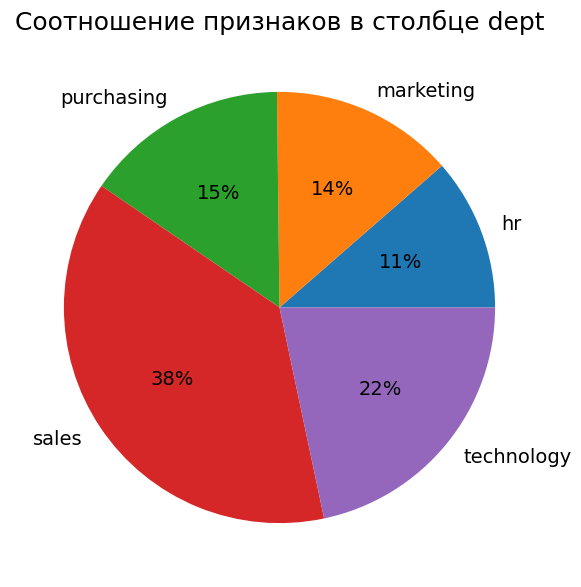

In [30]:
# Построим круговую диаграмму
object_pie(train_rate, 'dept')

Итак, на круговой диаграмме мы видим, что самый многочисленный отел это `sales` (отдел продаж) - 38% сотрудников работает в данном отделе, за ним следует отдел `technology` (технологический отдел) - 22%, на третьем месте расположился отел `purchasing` (отдел закупок) - 15%, на четвертом месте - отдел `marketing` (отдел маркетинга) - 14%, на последнем месте по численности сотрудников расположился отдел `hr` (HR-отдел) - 11%. 

Данные признака `dept` необходимо будет подготовить с помощью `OneHotEncoder` - так как столбец содержит набор различных отделом, которые не имеют порядка или ранга. 

Рассмотрим категориальный признак `level` — уровень занимаемой должности.

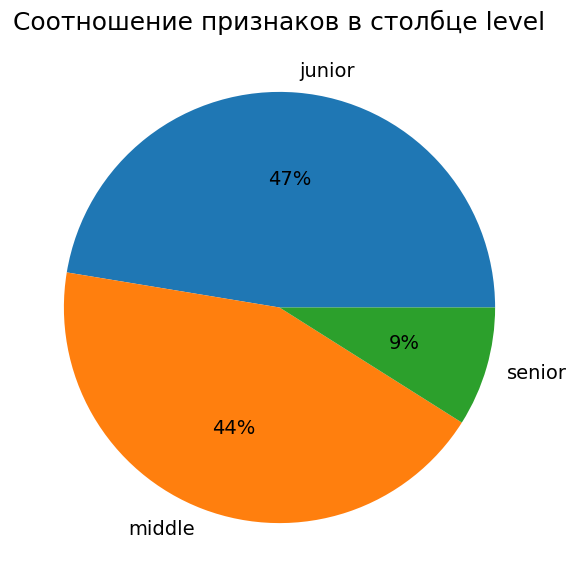

In [31]:
# Построим круговую диаграмму
object_pie(train_rate, 'level')

Итак, на круговой диаграмме мы видим, что самая многочисленная должность `junior` (младший специалист) - 47% сотрудников находятся в соответствующей должности. На втором месте по численности должность `middle` (специалист среднего уровня) - 44%. Меньше всего специалистов в должности `sinior` (высококвалифицированный специалист) - 9%. 

Данные признака `level` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder` - так как столбец содержит упорядоченные переменные. Должности имеют следующий порядок возрастания: `junior` (младший) далее `middle` (средний) и `sinior` (старший).

Рассмотрим категориальный признак `workload` — уровень загруженности сотрудника.

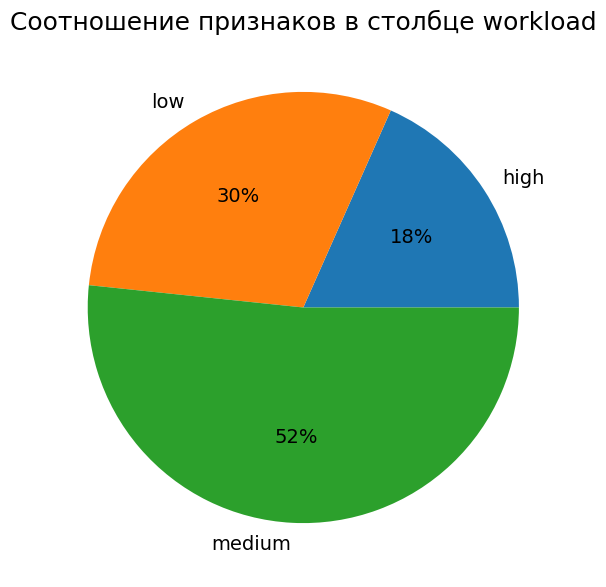

In [32]:
# Построим круговую диаграмму
object_pie(train_rate, 'workload')

Итак, на диаграмме мы видим, что наибольшее число сотрудников имеют уровень загруженности `medium` (средняя) - 52%, далее идут сотрудники с уровнем загруженности `low` (низкая) - 30% и меньше всего сотрудников имеют уровень загруженности `hight` (высокий) - 18%. 

Данные признака `workload` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder` - так как столбец содержит упорядоченные переменные. Уровни загруженности сотрудника имеют следующий порядок возрастания: `low` (низкая) далее `medium` (средняя) и `hight` (высокий).

Рассмотрим дискретный признак `employment_years` — длительность работы в компании (в годах).

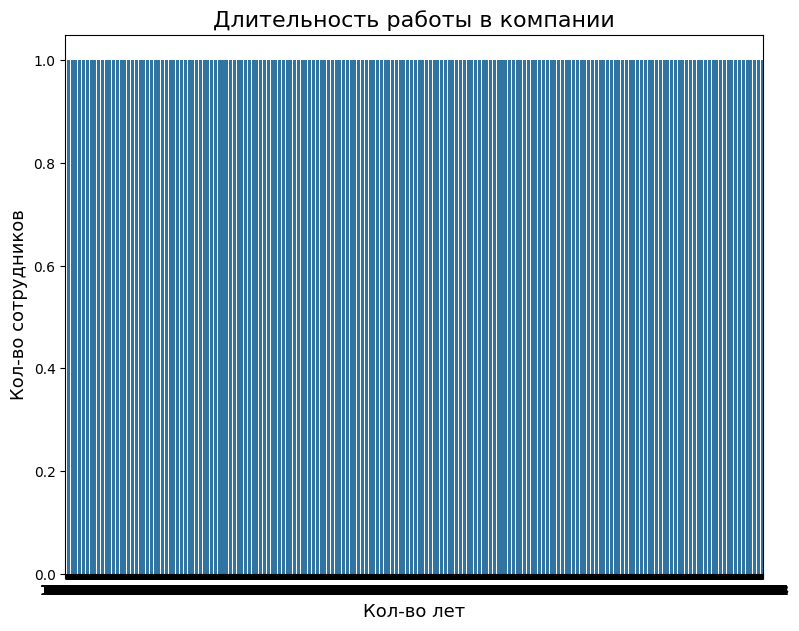

In [33]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(train_rate['employment_years'])

# Зададим параметры графику
plt.title('Длительность работы в компании', fontsize=16)
plt.xlabel('Кол-во лет', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.show()

Итак, мы можем наблюдать графи с обратной зависимостью - чем больше срок работы в компании, тем меньше сотрудников. Наибольшее число сотрудников работает 1 год в компании, так же довольно многочисленны сотрудники, работающие 2 года. Данные столбца `employment_years` для модели нужно будет масштабировать одним из видов сэмплера (`StandardScaler` или `MinMaxScaler`).

Рассмотрим категориальный признак `last_year_promo` — показывает, было ли повышение за последний год сотрудника.

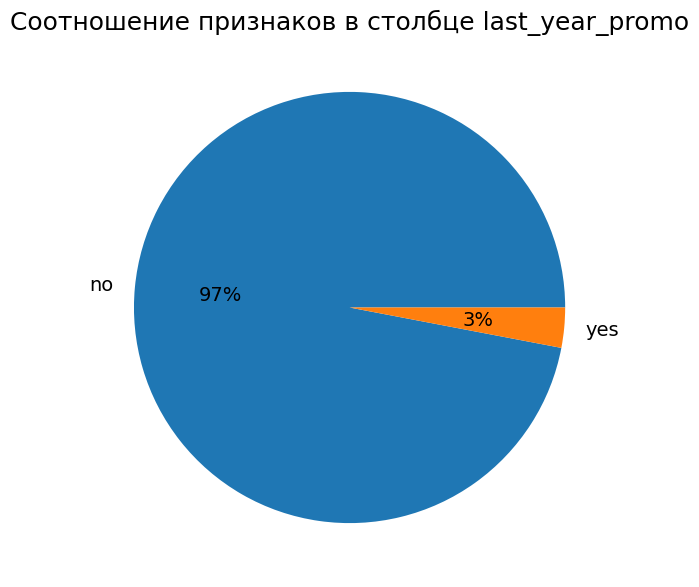

In [34]:
# Построим круговую диаграмму
object_pie(train_rate, 'last_year_promo')

Итак, на круговой диаграмме мы видим, что у 97% сотрудников не было повышения за последний год, только 3% сотрудников получили повышение за последний год. Данные признака `last_year_promo` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder`, т.к. для повышения уровня удовлетворённости сотрудника работой в компании скорее важнее, чтобы сотрудник получил повышение, чем нет, поэтому порядок будет `no-yes`.

Рассмотрим категориальный признак `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год.

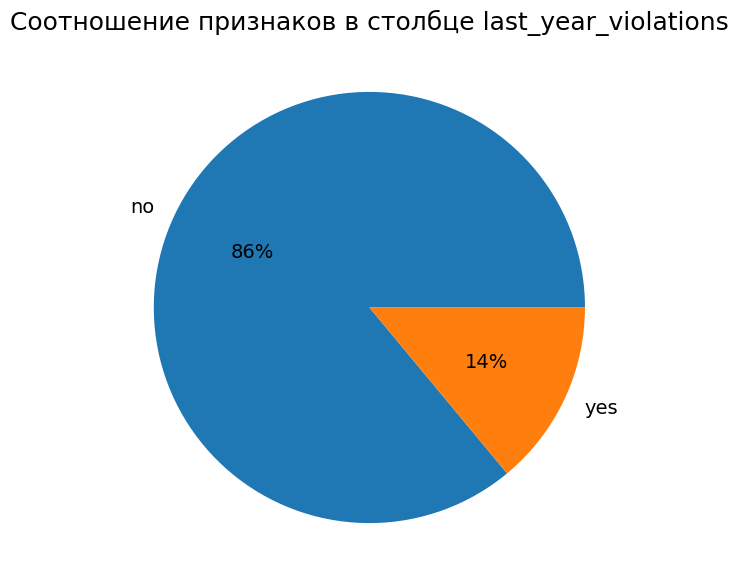

In [35]:
# Построим круговую диаграмму
object_pie(train_rate, 'last_year_violations')

Итак, на круговой диаграмме мы видим, что 86% сотрудников не нарушали трудовой договор за последний год, тогда как у 14% были эти нарушения. Данные признака `last_year_violations` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder`, т.к. скорее всего нарушение трудового договора негативно повлияет на уровень удовлетворённости сотрудника работой в компании, поэтому порядок будет `no-yes`.

Рассмотрим дискретный признак `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель.

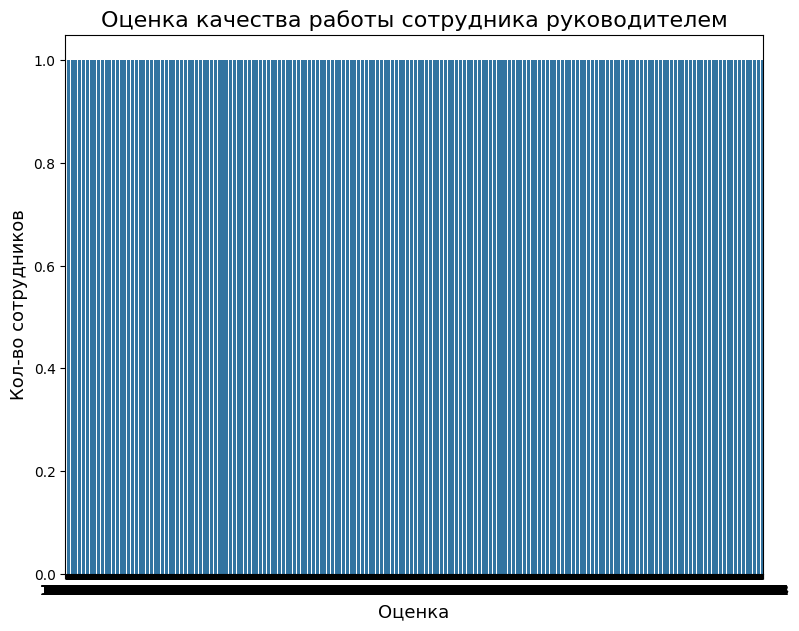

In [36]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(train_rate['supervisor_evaluation'])

# Зададим параметры графику
plt.title('Оценка качества работы сотрудника руководителем', fontsize=16)
plt.xlabel('Оценка', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.show()

Итак, наибольшее число сотрудников получило от руководителя оценку `4`, далее идут сотрудники с оценкой `3`, на третьем месте расположились сотрудники с наивысшей оценкой `5`, наименьшее число сотрудников получили оценки `2` и `1` соответственно. Данные столбца `supervisor_evaluation` для модели нужно будет подготовить с помощью кодировщика `OrdinalEncoder` - так как столбец содержит дискретные ранговые переменные.

Рассмотрим количественный признак `salary` — ежемесячная зарплата сотрудника.

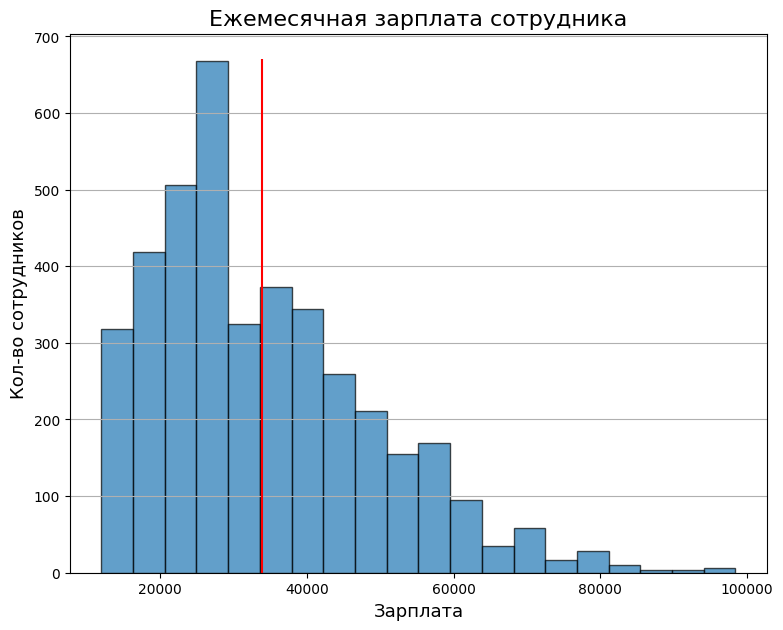

In [37]:
# Построим гистограмму 
train_rate['salary'].hist(bins=20, figsize=(9,7), alpha=0.7, edgecolor='black')

# Отобразим среднее
plt.vlines(train_rate['salary'].mean(), ymin=0, ymax=670, color='red', label='Среднее')

# Зададим параметры графику
plt.legend
plt.title('Ежемесячная зарплата сотрудника', fontsize=16)
plt.xlabel('Зарплата', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.grid(False, axis='x')
plt.show()

In [38]:
# Выведем описательные статистики
round(train_rate['salary'].describe().to_frame().T, 1)

,count,mean,std,min,25%,50%,75%,max
salary,4000.0,33926.7,14900.7,12000.0,22800.0,30000.0,43200.0,98400.0


Итак, мы видим график с нормальным распределением со смещением влево. Наибольшее число сотрудников имеет зарплату от 25 до 30 тыс. Средняя зарплата составляет 34 тыс. После отметки 30 тыс мы видим обратную зависимость, чем выше зарплата, тем меньше число сотрудников, получающие ее. Данные столбца `salary` для модели нужно будет масштабировать одним из видов сэмплера (`StandardScaler` или `MinMaxScaler`).

Рассмотрим **целевой признак** признак `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании.

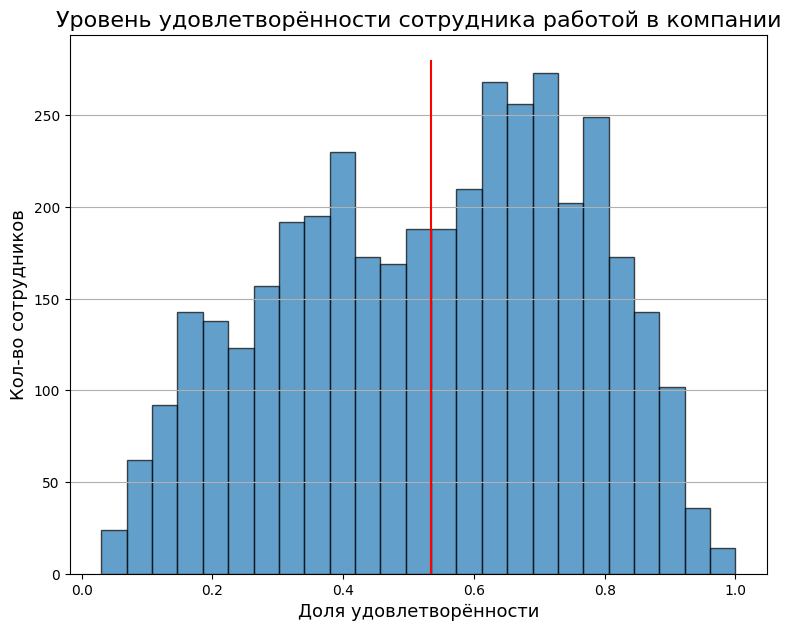

In [39]:
# Построим гистограмму 
train_rate['job_satisfaction_rate'].hist(bins=25, figsize=(9,7), alpha=0.7, edgecolor='black')

# Отобразим среднее
plt.vlines(train_rate['job_satisfaction_rate'].mean(), ymin=0, ymax=280, color='red', label='Среднее')

# Зададим параметры графику
plt.legend
plt.title('Уровень удовлетворённости сотрудника работой в компании', fontsize=16)
plt.xlabel('Доля удовлетворённости', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.grid(False, axis='x')
plt.show()

In [40]:
# Выведем описательные статистики
round(train_rate['job_satisfaction_rate'].describe().to_frame().T, 2)

,count,mean,std,min,25%,50%,75%,max
job_satisfaction_rate,4000.0,0.53,0.23,0.03,0.36,0.56,0.71,1.0


Итак, мы видим график с нормальным распределением. Наибольшее число сотрудников имеют уровень удовлетворенности работой в компании от 0.6 до 0.7. Средний уровень удовлетворенности составляет 0.53. Так же мы имеем довольно малые группы сотрудников (около 20 человек), кто практически не удовлетворен работой в компании и тех, кто полностью удовлетворен работой в компании. 

#### Проведем исследовательский анализ данных датасета `features.csv`

Датасет `features` имеет идентичные столбцы (за исключением целевого признака) что и датасет `train_rate`, поэтому способы подготовки данных будут аналогичны. 

Рассмотрим категориальный признак `dept` — отдел, в котором работает сотрудник.

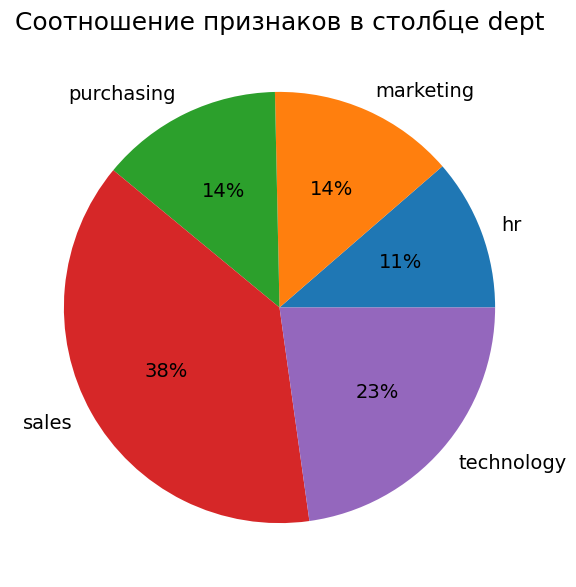

In [41]:
# Построим круговую диаграмму
object_pie(features, 'dept')

Итак, на круговой диаграмме мы видим, что самые многочисленный отел это `sales` (отдел продаж) - 38% сотрудников работает в данном отделе, за ним следует отдел `technology` (технологический отдел) - 23%, на третьем месте расположился отел `purchasing` (отдел закупок) - 14% и отдел `marketing` (отдел маркетинга) - 14%, на последнем месте по численности сотрудников расположился отдел `hr` (HR-отдел) - 11%. 

Рассмотрим категориальный признак `level` — уровень занимаемой должности.

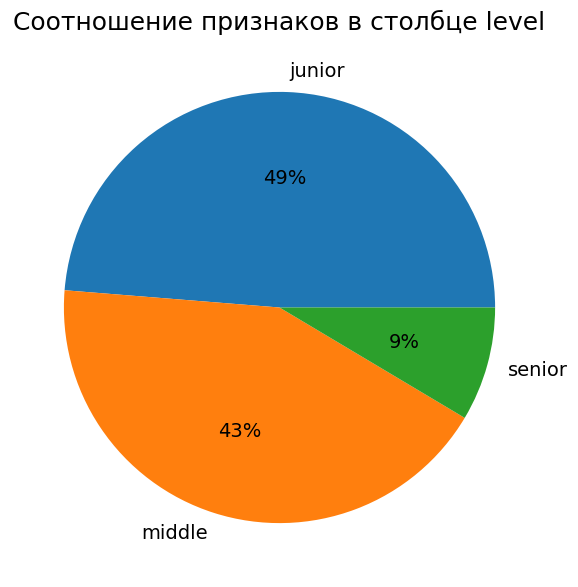

In [42]:
# Построим круговую диаграмму
object_pie(features, 'level')

Итак, на круговой диаграмме мы видим, что самая многочисленная должность `junior` (младший специалист) - 49% сотрудников находятся в соответствующей должности. На втором месте по численности должность `middle` (специалист среднего уровня) - 43%. Меньше всего специалистов в должности `sinior` (высококвалифицированный специалист) - 9%.

Рассмотрим категориальный признак `workload` — уровень загруженности сотрудника.

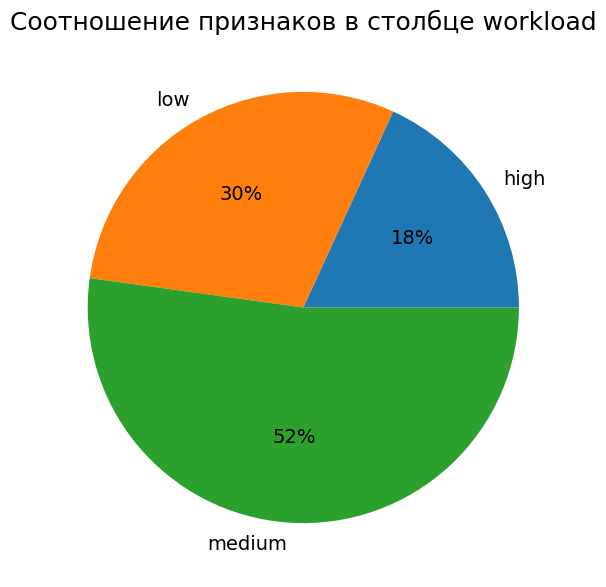

In [43]:
# Построим круговую диаграмму
object_pie(features, 'workload')

Итак, на диаграмме мы видим, что наибольшее число сотрудников имеют уровень загруженности `medium` (средняя) - 52%, далее идут сотрудники с уровнем загруженности `low` (низкая) - 30% и меньше всего сотрудников имеют уровень загруженности `hight` (высокий) - 18%. 

Рассмотрим дискретный признак `employment_years` — длительность работы в компании (в годах).

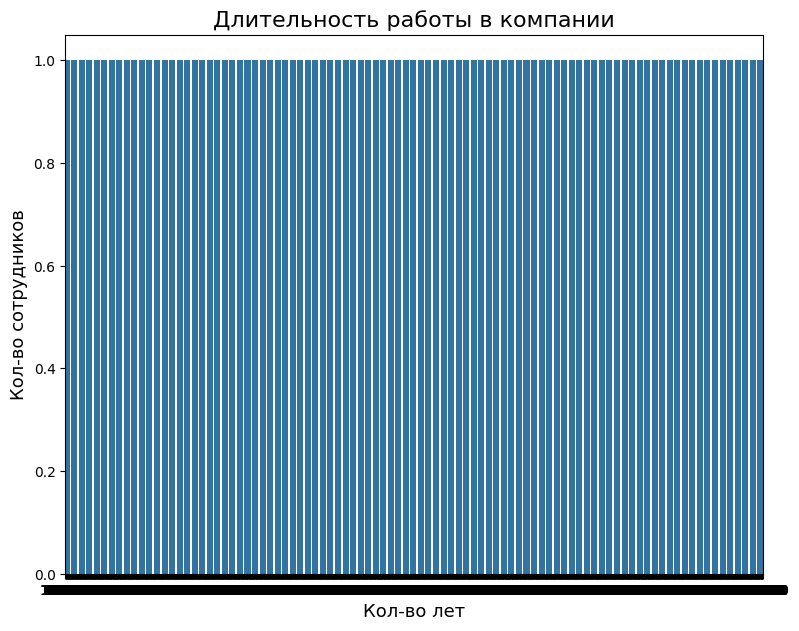

In [44]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(features['employment_years'])

# Зададим параметры графику
plt.title('Длительность работы в компании', fontsize=16)
plt.xlabel('Кол-во лет', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.show()

Итак, мы можем наблюдать графи с обратной зависимостью - чем больше срок работы в компании, тем меньше сотрудников. Наибольшее число сотрудников работает 1 год в компании, так же довольно многочисленны сотрудники, работающие 2 года.

Рассмотрим категориальный признак `last_year_promo` — показывает, было ли повышение за последний год сотрудника.

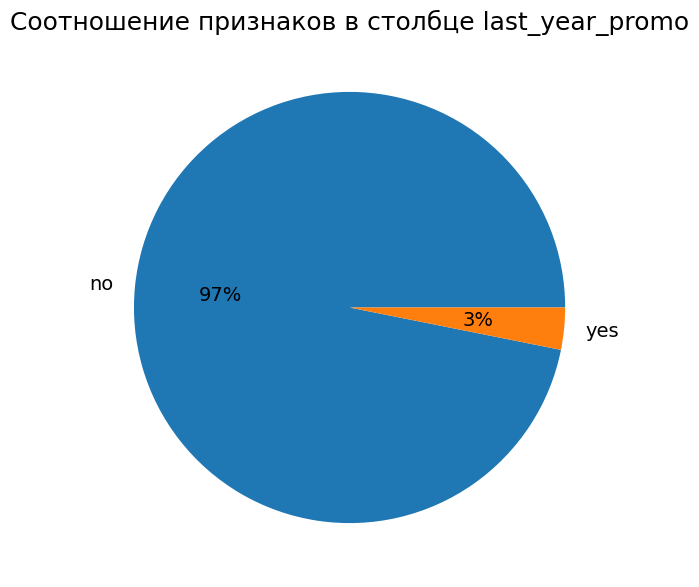

In [45]:
# Построим круговую диаграмму
object_pie(features, 'last_year_promo')

Итак, на круговой диаграмме мы видим, что у 97% сотрудников не было повышения за последний год, только 3% сотрудников получили повышение за последний год.

Рассмотрим категориальный признак `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год.

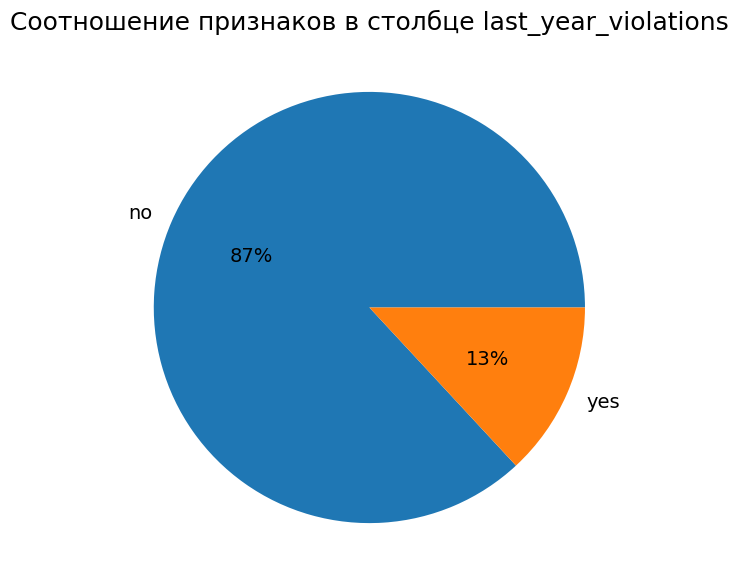

In [46]:
# Построим круговую диаграмму
object_pie(features, 'last_year_violations')

Итак, на круговой диаграмме мы видим, что 87% сотрудников не нарушали трудовой договор за последний год, тогда как у 13% были эти нарушения. 

Рассмотрим дискретный признак `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель.

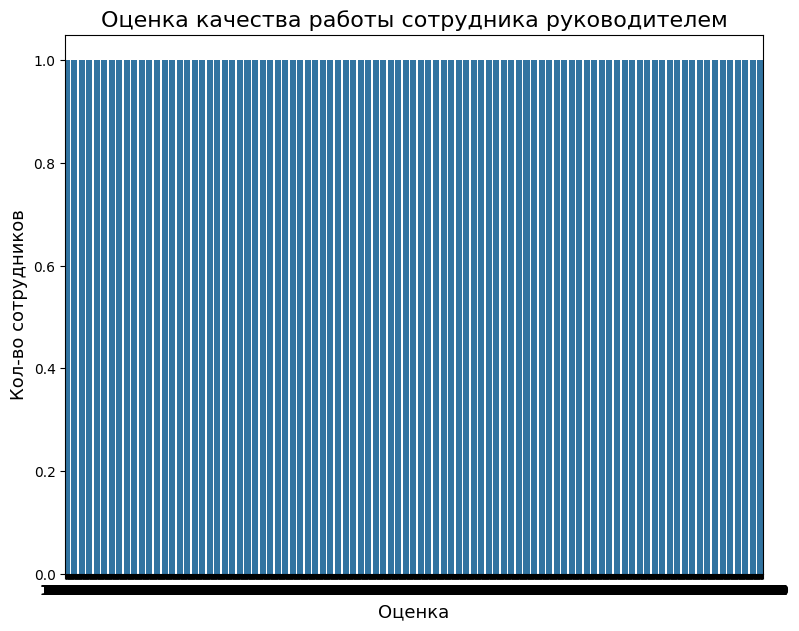

In [47]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(features['supervisor_evaluation'])

# Зададим параметры графику
plt.title('Оценка качества работы сотрудника руководителем', fontsize=16)
plt.xlabel('Оценка', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.show()

Итак, наибольшее число сотрудников получило от руководителя оценку `4`, далее идут сотрудники с оценкой `3`, на третьем месте расположились сотрудники с наивысшей оценкой `5`, наименьшее число сотрудников получили оценки `2` и `1` соответственно. Данные столбца `supervisor_evaluation` для модели нужно будет масштабировать одним из видов сэмплера (`StandardScaler` или `MinMaxScaler`).

Рассмотрим количественный признак `salary` — ежемесячная зарплата сотрудника.

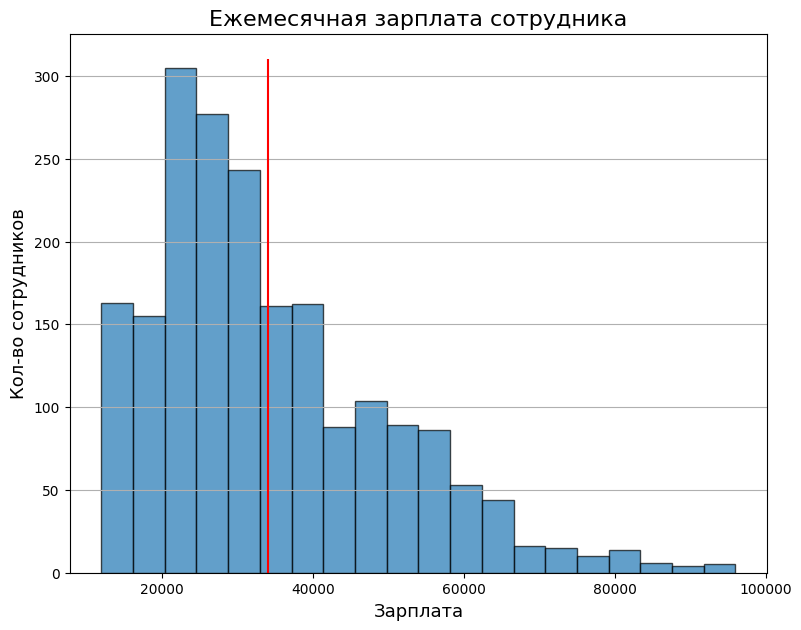

In [48]:
# Построим гистограмму 
features['salary'].hist(bins=20, figsize=(9,7), alpha=0.7, edgecolor='black')

# Отобразим среднее
plt.vlines(features['salary'].mean(), ymin=0, ymax=310, color='red', label='Среднее')

# Зададим параметры графику
plt.legend
plt.title('Ежемесячная зарплата сотрудника', fontsize=16)
plt.xlabel('Зарплата', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.grid(False, axis='x')
plt.show()

In [49]:
# Выведем описательные статистики
round(features['salary'].describe().to_frame().T, 1)

,count,mean,std,min,25%,50%,75%,max
salary,2000.0,34066.8,15398.4,12000.0,22800.0,30000.0,43200.0,96000.0


Итак, мы видим график с нормальным распределением со смещением влево. Наибольшее число сотрудников имеет зарплату от 20 до 30 тыс. Средняя зарплата составляет 34 тыс. После отметки 25 тыс мы видим обратную зависимость, чем выше зарплата, тем меньше число сотрудников, получающие ее.

#### Проведем исследовательский анализ данных датасета `target_rate`

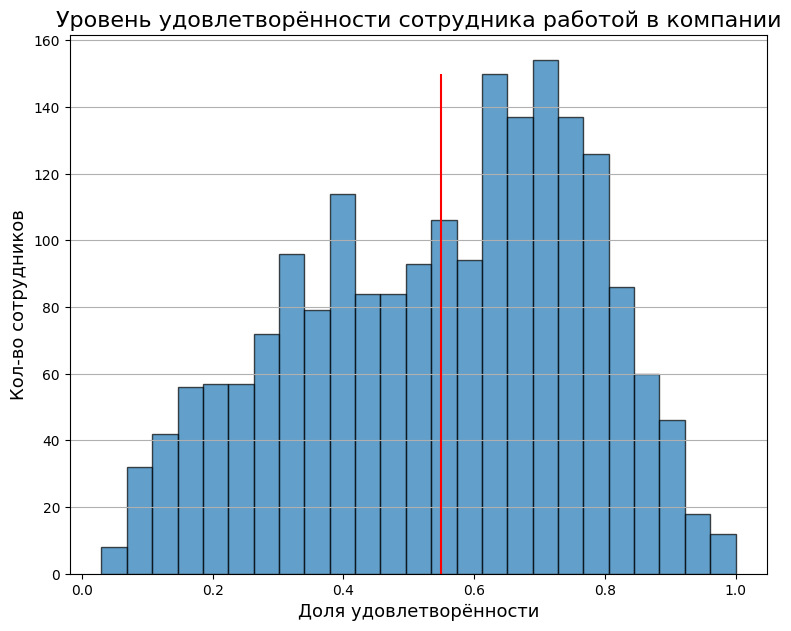

In [50]:
# Построим гистограмму 
target_rate['job_satisfaction_rate'].hist(bins=25, figsize=(9,7), alpha=0.7, edgecolor='black')

# Отобразим среднее
plt.vlines(target_rate['job_satisfaction_rate'].mean(), ymin=0, ymax=150, color='red', label='Среднее')

# Зададим параметры графику
plt.legend
plt.title('Уровень удовлетворённости сотрудника работой в компании', fontsize=16)
plt.xlabel('Доля удовлетворённости', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.grid(False, axis='x')
plt.show()

In [51]:
# Выведем описательные статистики
round(target_rate['job_satisfaction_rate'].describe().to_frame().T, 2)

,count,mean,std,min,25%,50%,75%,max
job_satisfaction_rate,2000.0,0.55,0.22,0.03,0.38,0.58,0.72,1.0


Итак, мы видим график с нормальным распределением. Наибольшее число сотрудников имеют уровень удовлетворенности работой в компании от 0.6 до 0.8. Средний уровень удовлетворенности составляет 0.55.

#### Промежуточный вывод:

Мы провели исследовательский анализ данных датасета **`train_rate`** и выявили следующее:

- Самый многочисленный отел это `sales` (отдел продаж) - 38% сотрудников работает в данном отделе, за ним следует отдел `technology` (технологический отдел) - 22%, далее отел `purchasing` (отдел закупок) - 15%, отдел `marketing` (отдел маркетинга) - 14% и отдел `hr` (HR-отдел) - 11%.  Данные признака `dept` необходимо будет подготовить с помощью `OneHotEncoder`.

- Самая многочисленная должность `junior` (младший специалист) - 47% сотрудников находятся в соответствующей должности, далее должность `middle` (специалист среднего уровня) - 44% и меньше всего специалистов в должности `sinior` (высококвалифицированный специалист) - 9%. Данные признака `level` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder`. Должности имеют следующий порядок возрастания: `junior` (младший) далее `middle` (средний) и `sinior` (старший).

- Наибольшее число сотрудников имеют уровень загруженности `medium` (средняя) - 52%, далее `low` (низкая) - 30% и `hight` (высокий) - 18%.  Данные признака `workload` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder`. Уровни загруженности сотрудника имеют следующий порядок возрастания: `low` (низкая) далее `medium` (средняя) и `hight` (высокий).

- Наибольшее число сотрудников работает 1 год в компании, так же довольно многочисленны сотрудники, работающие 2 года. Имеется обратная зависимость - чем больше срок работы в компании, тем меньше сотрудников. Данные столбца `employment_years` для модели нужно будет масштабировать одним из видов сэмплера (`StandardScaler` или `MinMaxScaler`).

- У 97% сотрудников не было повышения за последний год, только 3% сотрудников получили повышение за последний год. Данные признака `last_year_promo` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder`, порядок будет `no-yes`.

- 86% сотрудников не нарушали трудовой договор за последний год, тогда как у 14% были эти нарушения. Данные признака `last_year_violations` необходимо будет подготовить с помощью кодировщика `OrdinalEncoder`, порядок будет `no-yes`.

- Наибольшее число сотрудников получило от руководителя оценку `4`, далее идут сотрудники с оценкой `3`, далее сотрудники с наивысшей оценкой `5`, наименьшее число сотрудников получили оценки `2` и `1` соответственно. Данные столбца `supervisor_evaluation` для модели нужно будет масштабировать одним из видов сэмплера (`StandardScaler` или `MinMaxScaler`).

- Наибольшее число сотрудников имеет зарплату от 25 до 30 тыс. Средняя зарплата составляет 34 тыс. После отметки 30 тыс мы видим обратную зависимость, чем выше зарплата, тем меньше число сотрудников, получающие ее. Данные столбца `salary` для модели нужно будет масштабировать одним из видов сэмплера (`StandardScaler` или `MinMaxScaler`).

- Наибольшее число сотрудников имеют уровень удовлетворенности работой в компании от 0.6 до 0.7. Средний уровень удовлетворенности составляет 0.53. 


Мы провели исследовательский анализ данных датасета **`features`**, который имеет идентичные столбцы (за исключением целевого признака) что и датасет `train_rate`, поэтому способы подготовки данных для моделей будут аналогичны. Данные распределены аналогично, что и в датасете `train_rate` с незначительными отклонениями.


Мы провели исследовательский анализ данных датасета **`target_rate`** и выяснили, что наибольшее число сотрудников имеют уровень удовлетворенности работой в компании от 0.6 до 0.8. Средний уровень удовлетворенности составляет 0.55.

<a id='five_id'></a>
### Корреляционный анализ

Построим матрицу **корреляции Фи** для тренировочной выборки `train_rate`, она поможет нам найти взаимосвязь между категориальными и количественными признаками. 

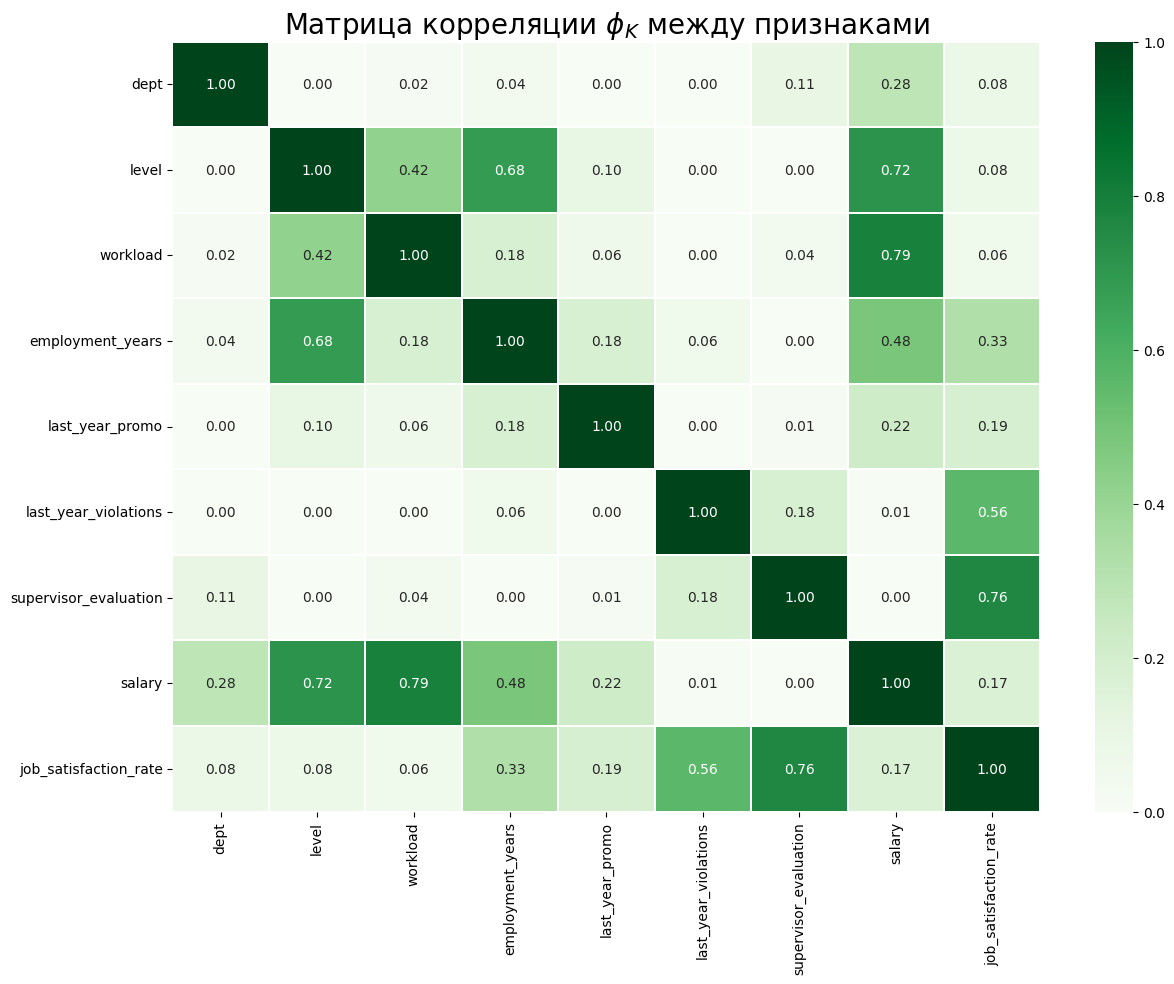

In [52]:
# Запишем в переменную непрерывные признаки
columns_num_cor = ['salary', 'job_satisfaction_rate']

# Построим матрицу корреляции с помощью тепловой карты heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(train_rate.phik_matrix(interval_cols=columns_num_cor), 
            annot=True, fmt='.2f', cmap='Greens', linewidths=0.1)
plt.title('Матрица корреляции $\phi_K$ между признаками', fontsize=20)
plt.show()

Темные тона говорят о сильной связи, а светлые — о слабой. Чем ближе значение к 1, тем сильнее связь. 

**С целевым признаком `job_satisfaction_rate`**:

*Сильную связь (Phik > 0.6)* имеют входные признаки:
- `supervisor_evaluation` (коэф. 0.76) - оценка качества работы сотрудника, которую дал руководитель

*Заметную связь (0.4 < Phik ≤ 0.6)* имеют входные признаки: 
- `last_year_violations` (коэф. 0.56) - показывает, нарушал ли сотрудник трудовой договор за последний год

*Умеренную связь (0.2 < Phik ≤ 0.4)* имеют входные признаки:
- `employment_years` (коэф. 0.33) -  длительность работы в компании (в годах)

*Слабую связь (0 ≤ Phik ≤ 0.2)* имеют входные признаки:
- `last_year_promo` (коэф. 0.19) - показывает, было ли повышение за последний год
- `salary` (коэф. 0.17) - ежемесячная зарплата сотрудника
- `dept` (коэф. 0.08) - отдел, в котором работает сотрудник
- `level` (коэф. 0.17) - уровень занимаемой должности
- `workload` (коэф. 0.17) - уровень загруженности сотрудника

Мультикоррелирующих входных признаков не обнаружено.

Построим матрицу **корреляции Фи** для тестовой выборки `features`, она поможет нам найти взаимосвязь между категориальными и количественными признаками. 

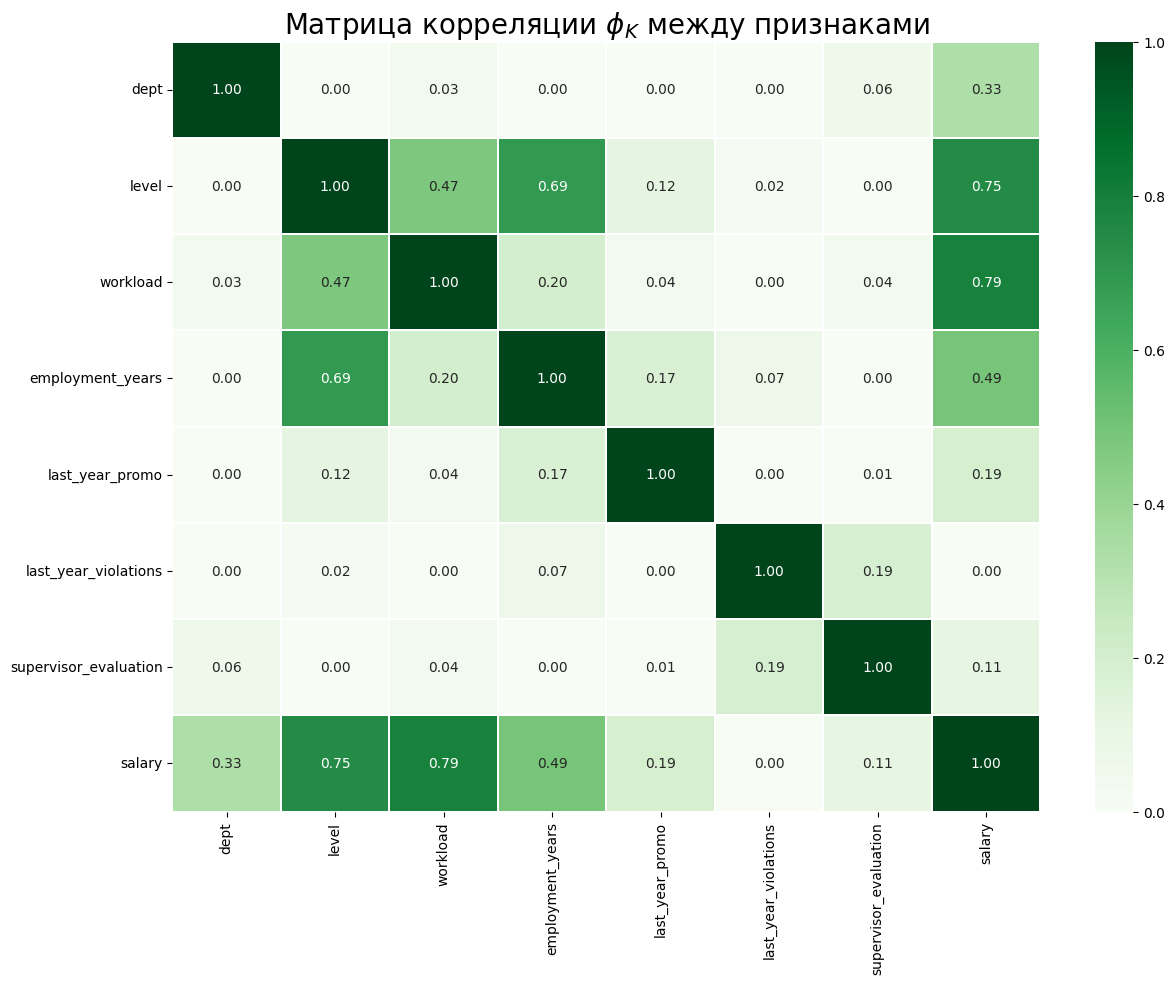

In [53]:
# Построим матрицу корреляции с помощью тепловой карты heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(features.phik_matrix(interval_cols=columns_num_cor), 
            annot=True, fmt='.2f', cmap='Greens', linewidths=0.1)
plt.title('Матрица корреляции $\phi_K$ между признаками', fontsize=20)
plt.show()

Итак, в тестовой выборке `features` входящие признаки корреляция признаков аналогична тренировочной выборки `train_rate`. Мультикоррелирующих входных признаков не обнаружено.

<a id='six_id'></a>
### Подготовка пайплайнов и выбор лучшей модели

Проверим датасет на наличие явных дубликатов повторно, после индекссации `id`.

In [54]:
# Проверим датасет на наличие явных дубликатов 
print(f'Кол-во явных дубликатов: {train_rate.duplicated().sum()}')

Кол-во явных дубликатов: 245


Итак, после индексации столбца `id` у нас появились явные дубликаты. Очистим датасет от явных дубликатов, т.к. ценности для модели такие наблюдения не принесут.

In [55]:
# Удалим явные дубликаты
train_rate_copy = train_rate.drop_duplicates()

print(f'Кол-во явных дубликатов: {train_rate_copy.duplicated().sum()}')

Кол-во явных дубликатов: 0


Мы успешно очистили датасет от явных дубликатов. 

Отделим целевой признак от обучающей выборки.

In [56]:
# Сохраним обучающую выборку в переменную X_train_rate
X_train_rate = train_rate_copy.drop('job_satisfaction_rate', axis=1)

# Сохраним целевой признак в переменную y_train_rate
y_train_rate = train_rate_copy['job_satisfaction_rate']

Объединим тестовые данные по индексу и отделим целевой признак, так у нас сохранится порядок сотрудников и расчет метрик будет корректным. 

In [57]:
# Объединим features и target_rate по индексу
features = features.join(target_rate)

# Сохраним тестовоую выборку в переменную X_test_rate
X_test_rate = features.drop('job_satisfaction_rate', axis=1)

# Сохраним целевой признак тестовой выборки в переменную y_test_rate
y_test_rate = features['job_satisfaction_rate']

Качество лучшей модели будем проверять на основе новой метрики — `SMAPE` (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 
Напишем функцию, которая принимает на вход массивы NumPy или объекты `Series` в pandas и возвращает значение метрики SMAPE. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

In [58]:
# Создадим свою метрику smape
def metric_smape(y_true, y_pred):
    try:
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        numerator = np.abs(y_true - y_pred)
        denominator = (np.abs(y_true) + np.abs(y_pred))/2    
        quotient = numerator / denominator
        metric = quotient.mean() * 100
        return metric
    except:
        print: ('Метрика недоступна, проверьте вводимые данные')

smape_score = make_scorer(metric_smape, greater_is_better=False)

Создадим списки с названиями признаков для кодирования и масштабирования.

In [59]:
# В переменную ohe_columns запишем категориальные признаки для OneHotEncoder
ohe_columns = ['dept']

# В переменную ord_columns запишем категориальные ранговые признаки для OrdinalEncoder
ord_columns = ['level', 'workload', 'last_year_promo', 'last_year_violations']

In [60]:
# В переменную num_columns запишем количественные признаки
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

Cоздадим пайплайн для подготовки данных кодированием `OneHotEncoder`

In [61]:
# Создадим пайплайн ohe_pipe для кодирования OneHotEncoder
ohe_pipe = Pipeline(
    [
        ('simpleimputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

Создадим пайплайн для подготовки данных кодированием `OrdinalEncoder`

In [62]:
# Создадим пайплайн ord_pipe для кодирования OrdinalEncoder
ord_pipe = Pipeline(
    [
        ('simpleimputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
        ('ord', OrdinalEncoder(categories=[
            ['junior', 'middle', 'sinior'], 
            ['low', 'medium', 'hight'], 
            ['no', 'yes'], 
            ['no', 'yes'],
        ], handle_unknown='use_encoded_value', unknown_value=np.nan)
        ), 
        ('simpleimputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))        
    ]
)

Создадим пайплайн для масштабирования данных.

In [63]:
# Создадим пайплайн num_pipe для масштабирования данных.
num_pipe = Pipeline(
    [
        ('simpleimputer_num', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-9999)), 
        ('num', StandardScaler())        
    ]
)

Создадим общий пайплайн для подготовки данных.

In [64]:
# Создадим общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns), 
        ('ord', ord_pipe, ord_columns), 
        ('num', num_pipe, num_columns)        
    ], 
    remainder='passthrough'
)

Cоздадим итоговый пайплайн: подготовка данных и модель.

In [65]:
# Cоздадим итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor), 
        ('models', LinearRegression())        
    ]
)

Cоздадим список моделей с гиперпараметрами для `GridSearchCV`

In [66]:
# Cоздадим список моделей с гиперпараметрами
param_grid = [
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }, 
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(3, 19),
        'models__min_samples_split': range(1, 4),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }
]

Подбор гиперпараметров будем проводить по сетке с помощью `GridSearchCV`, а для оценки качества модели будем использовать собственную метрику `SMAPE`.

In [67]:
# Используем GridSearchCV
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5, 
    scoring=smape_score, 
    n_jobs=-1
)

Обучим наши модели с гиперпараметрами и выведем лучшую модель и ее метрику.

In [68]:
# Обучаем модели
grid_search.fit(X_train_rate, y_train_rate)

print('Лучшая модель и её параметры:', grid_search.best_params_)
print ('Метрика SMAPE лучшей модели на кросс-валидации:', -grid_search.best_score_)

Лучшая модель и её параметры: {'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 16, 'models__min_samples_leaf': 3, 'models__min_samples_split': 2, 'preprocessor__num': MinMaxScaler()}
Метрика SMAPE лучшей модели на кросс-валидации: 15.744204209198335


Проверим работу лучшей модели на тестовой выборке.

In [69]:
# Выведем метрику SMAPE на тестовой выборке
print(f'Метрика SMAPE на тестовой выборке:', round(
    metric_smape(y_test_rate, grid_search.predict(X_test_rate)), 2))

Метрика SMAPE на тестовой выборке: 13.57


Итак, по итогам работы `GridSearchCV` мы получили лучшую модель `DecisionTreeRegressor(random_state=42, max_depth= 16, min_samples_leaf = 3, min_samples_split = 2)`и методом масштабирования `MinMaxScaler()`. Метрика `SMAPE` на кросс-валидации составила 15.74 (что является хорошим показателем по условию задачи, значит модель имеет низкое смещение), на тестовых данных метрика `SMAPE` нашей лучшей модели улучшилась и составила 13.57, что говорит о низком разбросе модели. Метрика `SMAPE < 15` на тестовой выборке, а значит модель успешно предсказала целевой признак.

Проверим нашу лучшую модель на адекватность, сравнив качество её предсказаний с качеством константной модели `DummyClassifier`.

In [70]:
# Обучим модель DummyRegressor
dummy = DummyRegressor()

dummy.fit(X_train_rate, y_train_rate)

# Выведем метрику SMAPE
print(f'Метрика SMAPE константной модели на тестовой выборке:', round(
    metric_smape(y_test_rate, dummy.predict(X_test_rate)), 2))

Метрика SMAPE константной модели на тестовой выборке: 38.26


Итак, мы получили метрику `SMAPE = 13.57` нашей **лучшей модели** на тестовых данных и метрику `SMAPE = 38.26` **константной модели**. Мы получили результат тестирования нашей лучшей модели на тестовой выборке лучше, чем результат константной модели на 24.69.

#### Оценка важности признаков для лучшей модели.

Построим график важности признаков для модели с помощью метода SHAP.

In [71]:
# С помощью пайплайна подготовим тестовую выборку для SHAP
X_shap = pd.DataFrame(
    grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test_rate), 
    columns=grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

In [72]:
# Рассчитаем SHAP
explainer = shap.Explainer(grid_search.best_estimator_.named_steps['models'], X_shap)

In [73]:
# Оценим значения SHAP для набора выборок
shap_values = explainer(X_shap, check_additivity=False)

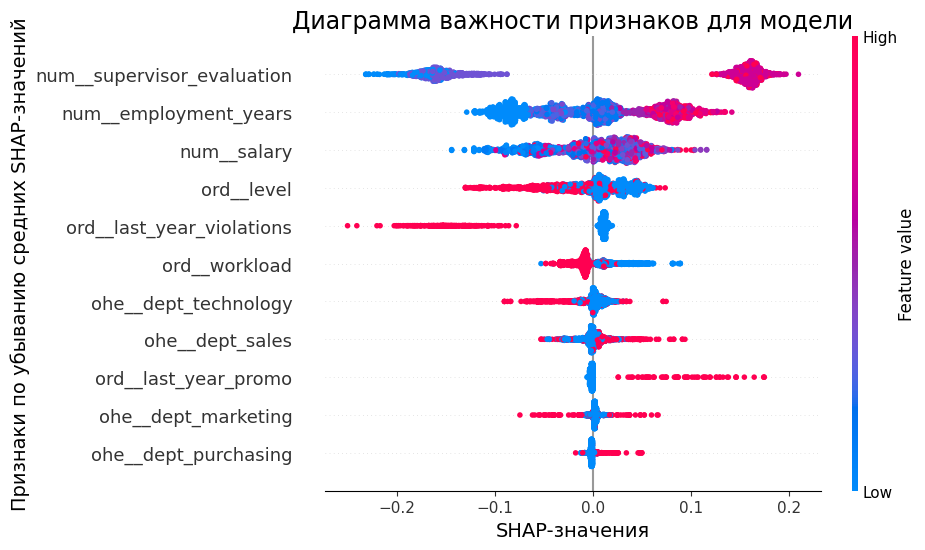

In [74]:
# Построим график shap
shap.plots.beeswarm(shap_values, max_display=12, show=False) 

ax = plt.gca()
ax.set_ylabel("Признаки по убыванию средних SHAP‑значений", fontsize=14)
ax.set_xlabel("SHAP-значения", fontsize=14)
ax.set_title('Диаграмма важности признаков для модели', fontsize=17)
plt.show()

На графике точками отображены все наблюдения из выборки. На оси X отложены значения Шепли, на оси Y — признаки модели, расположенные сверху вниз в порядке убывания средних SHAP‑значений. 

**Значимые** для модели признаки мы можем разбить на две категории:

**1.** Признаки, более высокие значения которых соответствуют более высоким спрогнозированным значениям (SHAP-значения растут по мере роста значения признака):
- `num__supervisor_evaluation` - чем выше оценка качества работы сотрудника, которую дал руководитель, тем более высокий уровень удовлетворённости сотрудника работой в компании.
- `num__employment_years` - чем дольше сотрудник работает в компании, тем более высокий уровень удовлетворённости сотрудника работой в компании.
- `num__salary` - более высокие ежемесячные зарплаты сотрудников соответствуют более высоким уровням удовлетворённости работой в компании.

**2.** Признаки, более высокие значения которых связаны с более низкими спрогнозированными значениями (чем больше значение признака, тем меньше SHAP-значение):

- `ord__level` - при кодировании у нас был порядок должностей `'junior→middle→sinior'`, после кодирования порядок `0→1→2`, получается, чем выше занимает должность сотрудник, тем меньше он может быть удовлетворен работой в компании. 
- `ord__last_year_violations` - при кодировании у нас был порядок `no→yes`, после кодирования порядок `0→1`, т.е. если сотрудник нарушал трудовой договор за последний год, то это увеличивает шанс низкого значения уровня удовлетворённости сотрудника работой в компании.

#### Промежуточные выводы

Итак, с помощью пайпланов и инструмента по подбору гиперпараметров `GridSearchCV` мы перебрали комбинации масштабирования данных методами `StandardScaler` и `MinMaxScaler` и гиперпараметры для 2-х моделей `DecisionTreeRegressor` и `LinearRegression`.

Получили лучшую модель `DecisionTreeRegressor(random_state=42, max_depth= 16, min_samples_leaf = 3, min_samples_split = 2)`и методом масштабирования `MinMaxScaler()`. Метрика `SMAPE` на тестовых составила 13.57. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

Проверили нашу лучшую модель на адекватность, получили метрику `SMAPE = 13.57` нашей **лучшей модели** на тестовых данных и метрику `SMAPE = 38.26` **константной модели**. Получили результат тестирования нашей лучшей модели на тестовой выборке лучше, чем результат константной модели на 24.69.

Выявили значимые для модели признаки и разбили их на две категории:

**1.** Признаки, более высокие значения которых соответствуют более высоким спрогнозированным значениям:

   - `num__supervisor_evaluation` - чем выше оценка качества работы сотрудника, которую дал руководитель, тем более высокий уровень удовлетворённости сотрудника работой в компании.
   - `num__employment_years` - чем дольше сотрудник работает в компании, тем более высокий уровень удовлетворённости сотрудника работой в компании.
   - `num__salary` - более высокие ежемесячные зарплаты сотрудников соответствуют более высоким уровням удовлетворённости работой в компании.

**2.** Признаки, более высокие значения которых связаны с более низкими спрогнозированными значениями:

   - `ord__level` - чем выше занимает должность сотрудник, тем меньше он может быть удовлетворен работой в компании. 
   - `ord__last_year_violations` - если сотрудник нарушал трудовой договор за последний год, то это увеличивает шанс низкого значения уровня удовлетворённости сотрудника работой в компании.

<a id='seven_id'></a>
## Вторая задача : предсказание увольнения сотрудника из компании

<a id='eight_id'></a>
### Загрузка данных

Загрузим данные в датафреймы `pandas`.

In [75]:
# Поместим датасет train_quit.csv в переменную train_quit
train_quit = pd.read_csv('/Users/eduardgorbacev/Desktop/Project_Yandex/Project_8/train_quit.csv')

# Поместим датасет test_target_quit.csv в переменную target_quit
target_quit = pd.read_csv('/Users/eduardgorbacev/Desktop/Project_Yandex/Project_8/test_target_quit.csv')

**Рассмотрим датасет `train_quit`**

In [76]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(train_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
449,102639,purchasing,junior,low,1,no,no,1,15600,yes
2923,968687,marketing,middle,high,8,no,no,4,57600,no
1961,331661,technology,junior,medium,1,no,yes,3,30000,yes
1908,667767,purchasing,sinior,medium,10,no,no,4,45600,no
3412,664306,purchasing,middle,medium,7,no,no,3,33600,no


(None, None)

Итак, датасет `train_quit` содержит аналогичные данные, что и датасет `train_rate`, за исключением столбца `job_satisfaction_rate`, вместо него мы имеем столбец `quit` (увольнение сотрудника из компании) - это целевой признак, который нам нужно будет предсказать. Данные в таблице соответствуют описанию. Наименования столбцов соответствуют стандартам оформления данных. Столбцы с типом данных `object` следует привести к типу `category`, так как они содержат категориальные типы данных, а преобразование ускорит последующую работу с данными. Столбец `id` следует сделать индексным.

**Рассмотрим датасет `target_quit`**

In [77]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(target_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
1268,755148,no
945,191225,no
83,517195,no
324,324986,yes
1882,435562,no


(None, None)

Итак, датасет `target_quit` содержит целевой признак `quit` - увольнение сотрудника из компании, который необходим нам для расчета метрик модели при предсказаниях на тестовой выборке (датасет `features`). Данные в таблице соответствуют описанию. Наименования столбцов соответствуют стандартам оформления данных. Столбец `id` следует сделать индексным, а столбец `quit` следует привести к типу `category`

**Промежуточный вывод:**

Мы изучили данные в датасетах: 

- `train_quit` - является тренировочной выборкой с целевым признаком `quit`. Содержит данные о сотрудниках. Данный датасет необходим для обучения модели. 
- `features` -  является тестовой выборкой, на которой наша модель предскажет целевой признак. 
- `target_quit` - содержит целевой признак `quit` (увольнение сотрудника из компании) тестовой выборки `features` и необходим для расчета метрик модели при предсказаниях на тестовой выборке.

На этапе предобработки данных столбцы с типом данных `object` следует привести к типу `category`, а столбец `id` следует сделать индексным.

<a id='nine_id'></a>
### Предобработка данных

#### Проведем предобработку данных датасета `train_quit`.

In [78]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(train_quit)

,0
id,0
dept,0
level,0
workload,0
employment_years,0
last_year_promo,0
last_year_violations,0
supervisor_evaluation,0
salary,0
quit,0


,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28,260158.03,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70,2.54,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47,1.00,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80,15152.42,12000.0,22800.00,30000.0,43200.00,96000.0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit


In [79]:
# Проверим датасет на наличие неявных дубликатов по столбцу "id"
print(f'Кол-во дубликатов по столбцу id: {train_quit["id"].duplicated().sum()}')

Кол-во дубликатов по столбцу id: 0


Итак, в датасете `train_quit` отсутствуют пропуски, явные и неявные (по столбцу `id`) дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. 

In [80]:
# Сделаем столбец id индексным
train_quit = train_quit.set_index('id')

In [81]:
# Преобразуем данные с типом "object" в "category"
columns_category_quit = train_quit.select_dtypes(include='object').columns

for column in columns_category_quit:
    train_quit[column] = train_quit[column].astype('category')

In [82]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(train_quit)

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   4000 non-null   category
 1   level                  4000 non-null   category
 2   workload               4000 non-null   category
 3   employment_years       4000 non-null   int64   
 4   last_year_promo        4000 non-null   category
 5   last_year_violations   4000 non-null   category
 6   supervisor_evaluation  4000 non-null   int64   
 7   salary                 4000 non-null   int64   
 8   quit                   4000 non-null   category
dtypes: category(6), int64(3)
memory usage: 149.3 KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
946387,sales,middle,high,3,no,no,3,48000,yes
312378,technology,junior,medium,3,no,no,4,26400,no
326732,technology,junior,low,1,no,no,5,24000,no
359629,marketing,middle,low,10,no,no,4,31200,no
654730,technology,middle,high,5,no,yes,3,55200,no


(None, None)

Столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Проверим уникальные значения во всех категориальных столбцах.

In [83]:
# Выведем уникальные значения категориальных столбцов
for column in columns_category_quit:
    print(f'Уникальные значения в столбце {column}: {train_quit[column].unique()}')

Уникальные значения в столбце dept: ['sales', 'purchasing', 'marketing', 'technology', 'hr']
Categories (5, object): ['hr', 'marketing', 'purchasing', 'sales', 'technology']
Уникальные значения в столбце level: ['middle', 'junior', 'sinior']
Categories (3, object): ['junior', 'middle', 'sinior']
Уникальные значения в столбце workload: ['high', 'medium', 'low']
Categories (3, object): ['high', 'low', 'medium']
Уникальные значения в столбце last_year_promo: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Уникальные значения в столбце last_year_violations: ['no', 'yes']
Categories (2, object): ['no', 'yes']
Уникальные значения в столбце quit: ['no', 'yes']
Categories (2, object): ['no', 'yes']


В столбце `level` необходимо исправить грамматическую ошибку, заменим `sinior` на `senior`. Целевой признак `quit` содержит два уникальных значения `no` и `yes`, значит нам предстоит решить задачу бинарной классификации. 

In [84]:
# Заменим значение sinior на senior
train_quit['level'] = train_quit['level'].replace('sinior', 'senior')

#### Проведем предобработку данных датасета `target_quit`.

In [85]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(target_quit)

,0
id,0
quit,0


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21,253851.33,100298.0,339052.0,550793.0,765763.75,999029.0


,id,quit


In [86]:
# Проверим датасет на наличие неявных дубликатов по столбцу "id"
print(f'Кол-во дубликатов по столбцу id: {target_quit["id"].duplicated().sum()}')

Кол-во дубликатов по столбцу id: 0


В датасете `target_quit` отсутствуют пропуски, явные и неявные (по столбцу `id`) дубликаты.

In [87]:
# Сделаем столбец id индексным
target_quit = target_quit.set_index('id')

In [88]:
# Преобразуем данные с типом "object" в "category"
target_quit['quit'] = target_quit['quit'].astype('category')

In [89]:
# Выведем уникальные значения целевого признака
target_quit['quit'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

Кол-во категорий соответствует кол-ву уникальных значений. 

#### Промежуточный вывод:

- В датасете `target_quit` cтолбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`.

- В датасете `target_quit` отсутствуют пропуски, явные и неявные (по столбцу `id`) дубликаты. Столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Целевой признак `quit` содержит два уникальных значения `no` и `yes`, значит нам предстоит решить задачу бинарной классификации. 

<a id='ten_id'></a>
### Исследовательский анализ данных

#### Проведем исследовательский анализ данных датасета `train_quit`

Датасет `train_quit` имеет идентичные столбцы (за исключением целевого признака) что и датасет `train_rate`, поэтому способы подготовки входных данных будут аналогичны. 

Рассмотрим категориальный признак `dept` — отдел, в котором работает сотрудник.

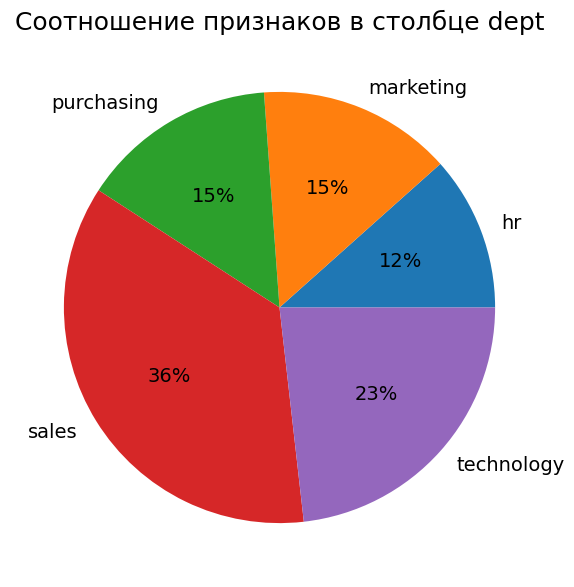

In [90]:
# Построим круговую диаграмму
object_pie(train_quit, 'dept')

Итак, на круговой диаграмме мы видим, что самый многочисленный отел это `sales` (отдел продаж) - 36% сотрудников работает в данном отделе, за ним следует отдел `technology` (технологический отдел) - 23%, на третьем месте расположился отел `purchasing` (отдел закупок) - 15% и отдел `marketing` (отдел маркетинга) - 15%, на последнем месте по численности сотрудников расположился отдел `hr` (HR-отдел) - 12%. 

Рассмотрим категориальный признак `level` — уровень занимаемой должности.

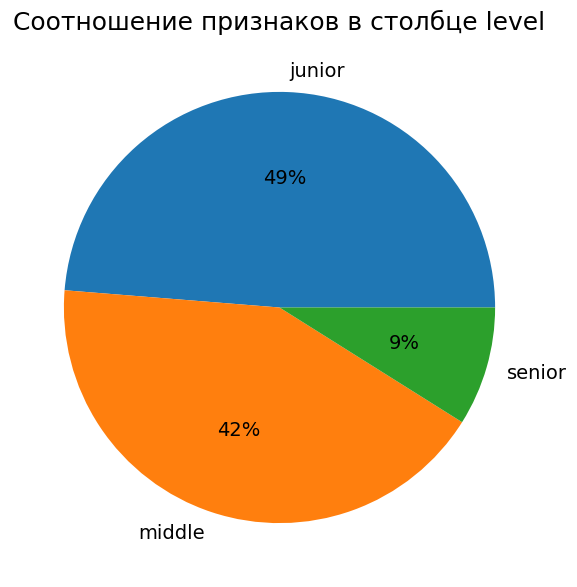

In [91]:
# Построим круговую диаграмму
object_pie(train_quit, 'level')

Итак, на круговой диаграмме мы видим, что самая многочисленная должность `junior` (младший специалист) - 49% сотрудников находятся в соответствующей должности. На втором месте по численности должность `middle` (специалист среднего уровня) - 42%. Меньше всего специалистов в должности `sinior` (высококвалифицированный специалист) - 9%. 

Рассмотрим категориальный признак `workload` — уровень загруженности сотрудника.

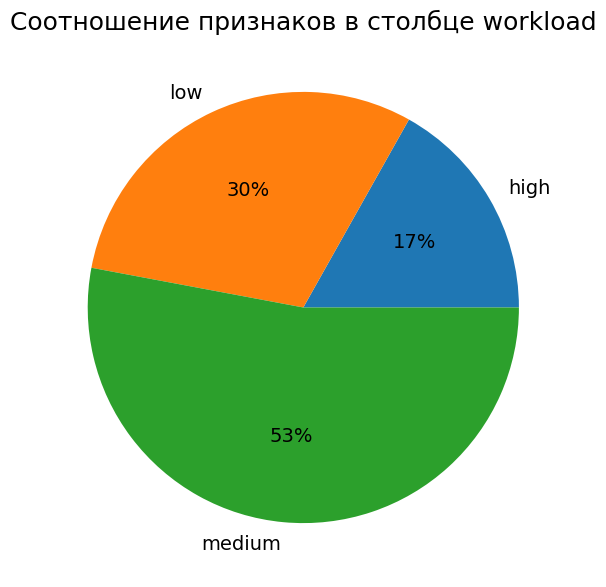

In [92]:
# Построим круговую диаграмму
object_pie(train_quit, 'workload')

Итак, на диаграмме мы видим, что наибольшее число сотрудников имеют уровень загруженности `medium` (средняя) - 53%, далее идут сотрудники с уровнем загруженности `low` (низкая) - 30% и меньше всего сотрудников имеют уровень загруженности `hight` (высокий) - 17%. 

Рассмотрим дискретный признак `employment_years` — длительность работы в компании (в годах).

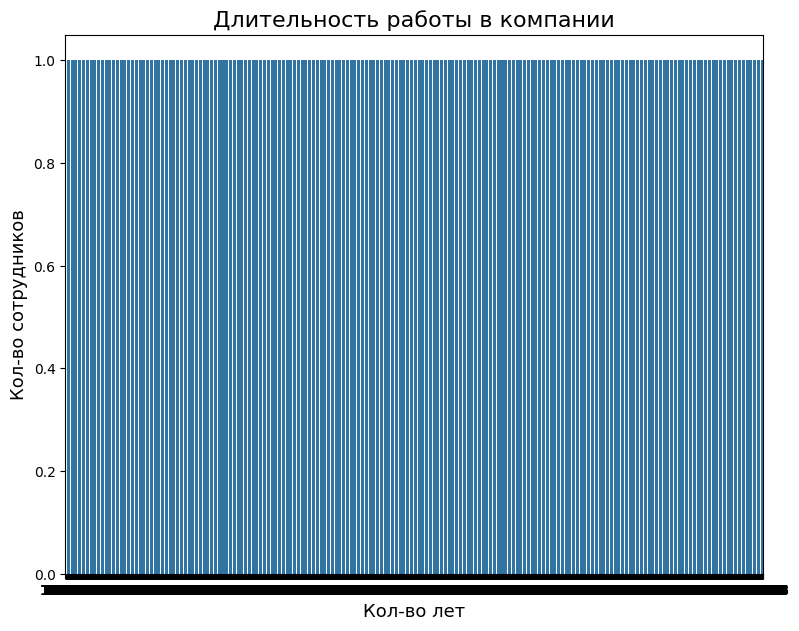

In [93]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(train_quit['employment_years'])

# Зададим параметры графику
plt.title('Длительность работы в компании', fontsize=16)
plt.xlabel('Кол-во лет', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.show()

Итак, мы можем наблюдать графи с обратной зависимостью - чем больше срок работы в компании, тем меньше сотрудников. Наибольшее число сотрудников работает 1 год в компании, так же довольно многочисленны сотрудники, работающие 2 года. 

Рассмотрим категориальный признак `last_year_promo` — показывает, было ли повышение за последний год сотрудника.

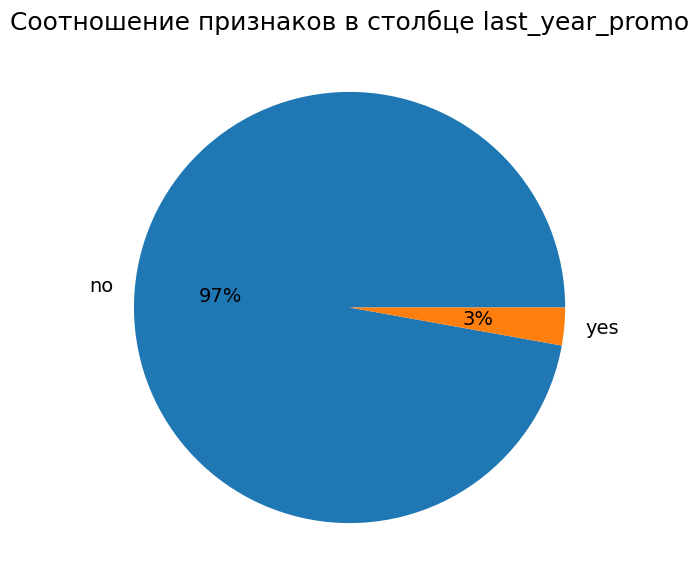

In [94]:
# Построим круговую диаграмму
object_pie(train_quit, 'last_year_promo')

Итак, на круговой диаграмме мы видим, что у 97% сотрудников не было повышения за последний год, только 3% сотрудников получили повышение за последний год. 

Рассмотрим категориальный признак `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год.

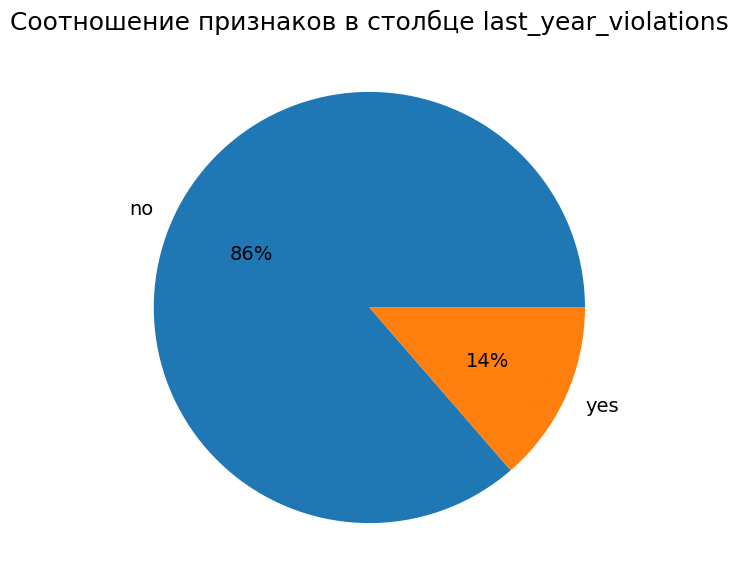

In [95]:
# Построим круговую диаграмму
object_pie(train_quit, 'last_year_violations')

Итак, на круговой диаграмме мы видим, что 86% сотрудников не нарушали трудовой договор за последний год, тогда как у 14% были эти нарушения.

Рассмотрим дискретный признак `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель.

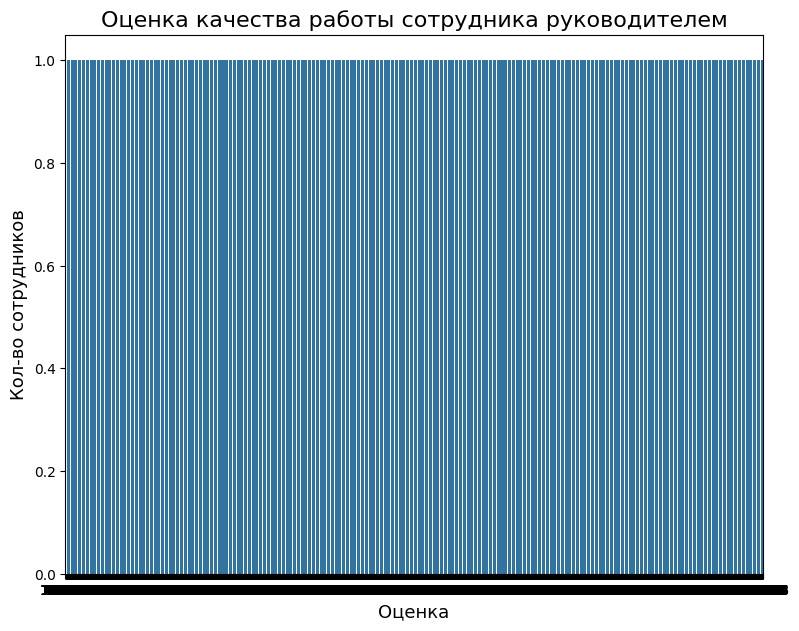

In [96]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(train_quit['supervisor_evaluation'])

# Зададим параметры графику
plt.title('Оценка качества работы сотрудника руководителем', fontsize=16)
plt.xlabel('Оценка', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.show()

Итак, наибольшее число сотрудников получило от руководителя оценку `4`, далее идут сотрудники с оценкой `3`, на третьем месте расположились сотрудники с наивысшей оценкой `5`, наименьшее число сотрудников получили оценки `2` и `1` соответственно. 

Рассмотрим количественный признак `salary` — ежемесячная зарплата сотрудника.

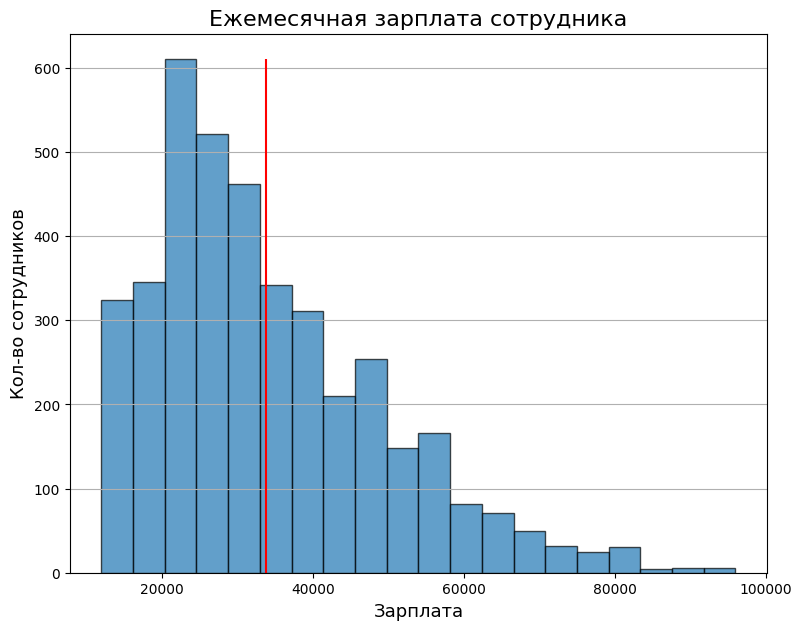

In [97]:
# Построим гистограмму 
train_quit['salary'].hist(bins=20, figsize=(9,7), alpha=0.7, edgecolor='black')

# Отобразим среднее
plt.vlines(train_quit['salary'].mean(), ymin=0, ymax=610, color='red', label='Среднее')

# Зададим параметры графику
plt.legend
plt.title('Ежемесячная зарплата сотрудника', fontsize=16)
plt.xlabel('Зарплата', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.grid(False, axis='x')
plt.show()

In [98]:
# Выведем описательные статистики
round(train_quit['salary'].describe().to_frame().T, 1)

,count,mean,std,min,25%,50%,75%,max
salary,4000.0,33805.8,15152.4,12000.0,22800.0,30000.0,43200.0,96000.0


Итак, мы видим график с нормальным распределением со смещением влево. Наибольшее число сотрудников имеет зарплату от 20 до 30 тыс. Средняя зарплата составляет 34 тыс. После отметки 30 тыс мы видим обратную зависимость, чем выше зарплата, тем меньше число сотрудников, получающие ее.

Рассмотрим **целевой признак** признак `quit` — увольнение сотрудника из компании.

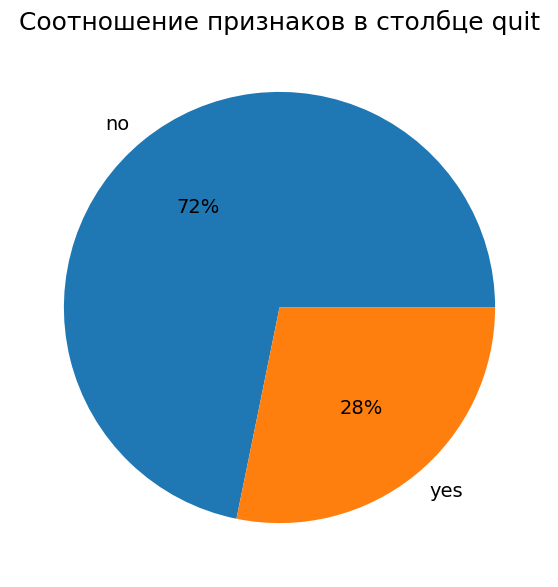

In [99]:
# Построим круговую диаграмму
object_pie(train_quit, 'quit')

Итак, в тренировочной выборке можно 72% сотрудников не уволились из компании, тогда как 28% сотрудников - уволились. У целевого признака мы наблюдаем дисбаланс классов (увольняющихся сотрудников гораздо меньше, чем тех, кто остаются в компании). Для подготовки целевого признака будем использовать кодировщик `LabelEncoder.`

#### Составим портрет «уволившегося сотрудника»

Рассмотрим признак `dept` — отдел, в котором работал сотрудник.

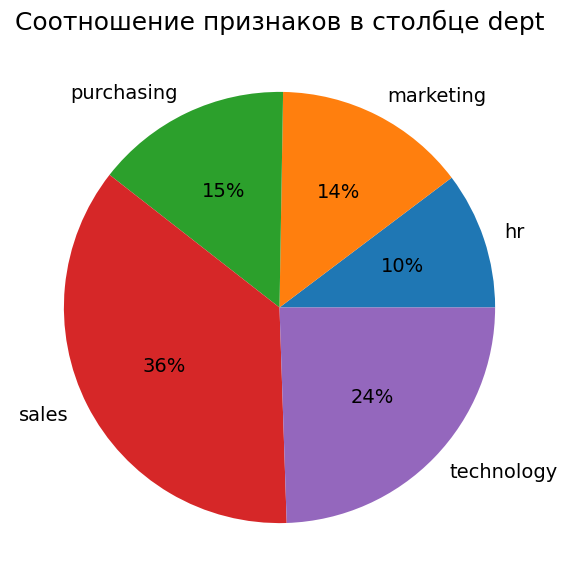

In [100]:
# Построим круговую диаграмму
object_pie(train_quit.query('quit == "yes"'), 'dept')

Итак, наибольшее число уволившихся сотрудников работало в отделе продаж `sales` - 36%, второй по многочисленности - технологический отдел `technology` - 24%, на третьем месте расположился отел `purchasing` (отдел закупок) - 15%, на четвертом - отдел `marketing` (отдел маркетинга) - 15%, на последнем месте расположился отдел `hr` (HR-отдел) - 10%. 

Рассмотрим признак `level` — должность, которую занимал сотрудник.

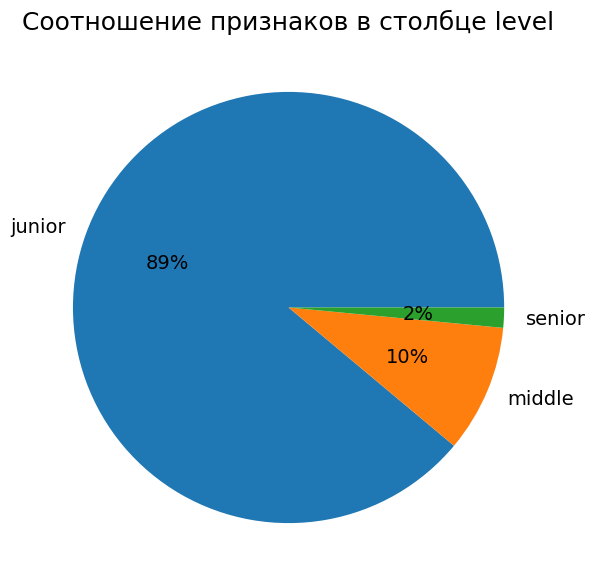

In [101]:
# Построим круговую диаграмму
object_pie(train_quit.query('quit == "yes"'), 'level')

Итак, практически все уволившиеся сотрудники занимали должность `junior` (младший специалист) - 89%. Должности `middle` (специалист среднего уровня) - 10%. Меньше всего уволившихся специалистов должности `sinior` (высококвалифицированный специалист) - 2%. 

Рассмотрим признак `workload` — уровень загруженности уволившихся сотрудников.

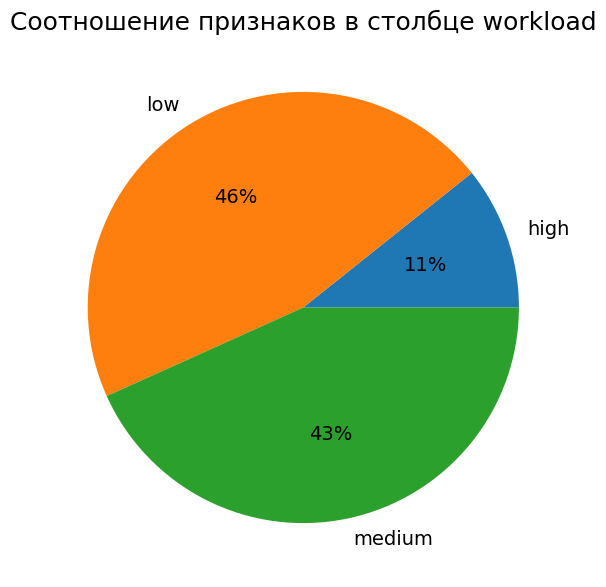

In [102]:
# Построим круговую диаграмму
object_pie(train_quit.query('quit == "yes"'), 'workload')

Итак, практически все уволившиеся сотрудники имели низкую `low` и среднюю `medium` загрузку - 46% и 43% соответственно. Уволившихся сотрудников с высокой `hight` загрузкой меньше всего - 11%.

Рассмотрим признак `employment_years` — сколько лет отработали уволившиеся сотрудники в компании.

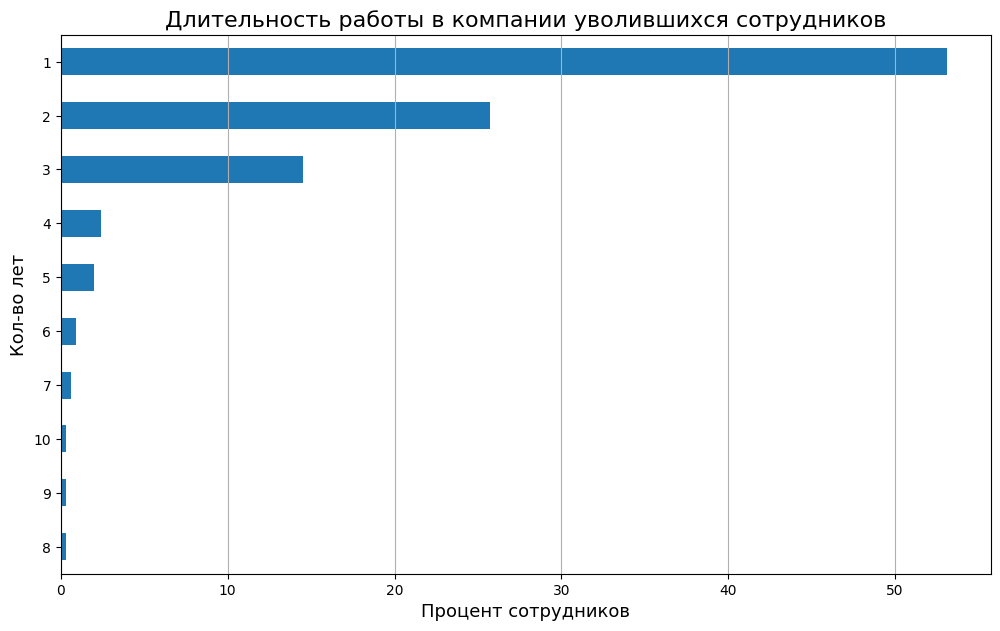

In [103]:
# Построим график для дискретного признака
plt.figure(figsize=(12, 7))

(round((train_quit.query('quit == "yes"')).groupby('employment_years')['employment_years']
       .count()/len(train_quit.query('quit == "yes"'))*100, 1)
).sort_values().plot(kind='barh')

# Зададим параметры графику
plt.title('Длительность работы в компании уволившихся сотрудников', fontsize=16)
plt.xlabel('Процент сотрудников', fontsize=13)
plt.ylabel('Кол-во лет', fontsize=13)
plt.grid(True, axis='x')
plt.show()

Итак, на графике отображено, какой процент уволившихся сотрудников отработал соответствующее кол-во лет в компании, отсортированные в порядке убывания процентного соотношения. Более 50% всех уволившихся сотрудников отработали только 1 год в компании. 

Рассмотрим признак `last_year_promo` — показывает, было ли повышение за последний год уволившегося сотрудника.

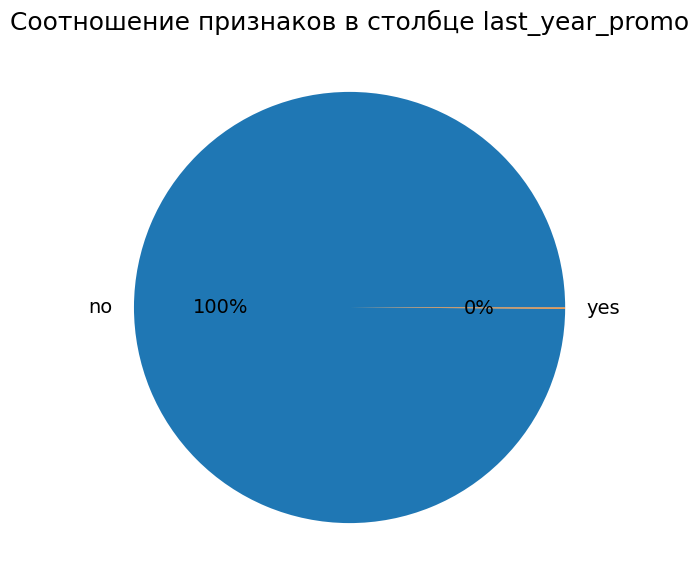

In [104]:
# Построим круговую диаграмму
object_pie(train_quit.query('quit == "yes"'), 'last_year_promo')

Ни у одного уволившегося сотрудника не было повышения за последний год. 

Рассмотрим признак `last_year_violations` — показывает, нарушал ли уволившийся сотрудник трудовой договор за последний год.

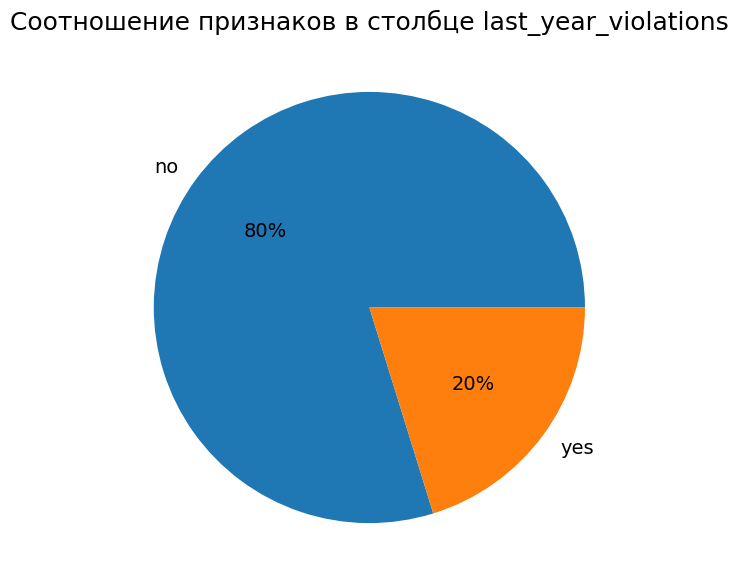

In [105]:
# Построим круговую диаграмму
object_pie(train_quit.query('quit == "yes"'), 'last_year_violations')

Итак, среди уволившихся сотрудников у 20% было нарушение трудового договора за последний год. 

Рассмотрим признак `supervisor_evaluation` — оценка качества работы уволившихся сотрудников, которую дал руководитель.

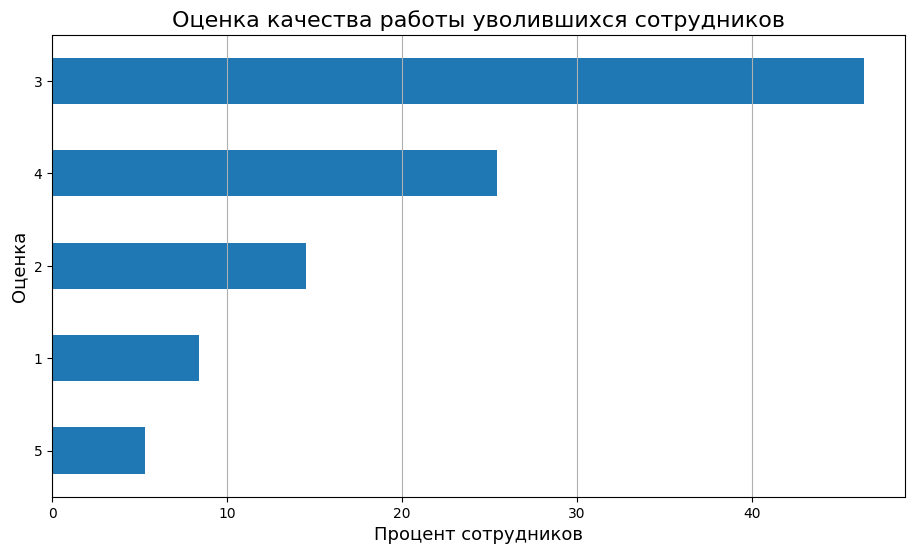

In [106]:
# Построим график для дискретного признака
plt.figure(figsize=(11, 6))

(round((train_quit.query('quit == "yes"')).groupby('supervisor_evaluation')['supervisor_evaluation']
       .count()/len(train_quit.query('quit == "yes"'))*100, 1)
).sort_values().plot(kind='barh')

    
# Зададим параметры графику
plt.title('Оценка качества работы уволившихся сотрудников', fontsize=16)
plt.xlabel('Процент сотрудников', fontsize=13)
plt.ylabel('Оценка', fontsize=13)
plt.grid(True, axis='x')
plt.show()

Итак, на графике отображено, какой процент уволившихся сотрудников имел ту или иную оценку от руководителя, отсортированные в порядке убывания процентного соотношения. Более 45 % уволенных сотрудников имели оценку от руководителя `3`.

Рассмотрим признак `salary` — ежемесячная зарплата уволившегося сотрудника.

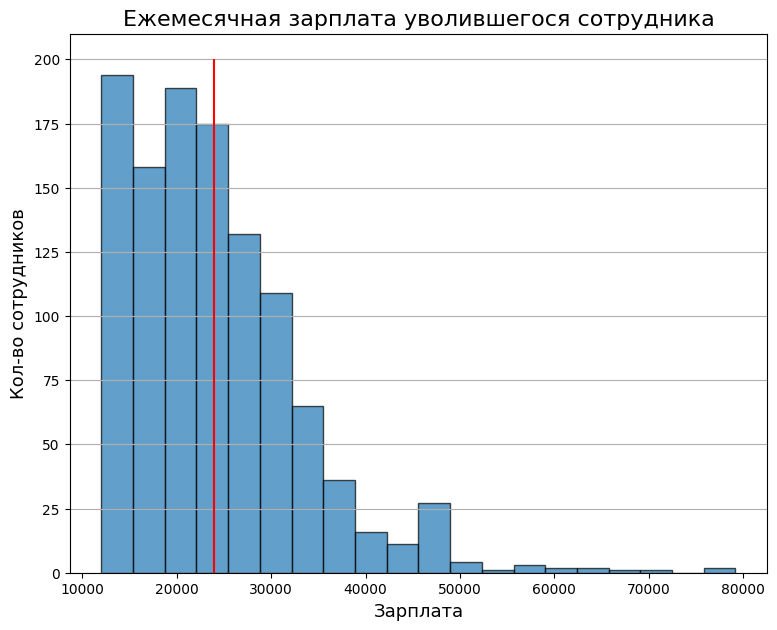

In [107]:
# Построим гистограмму 
train_quit.query('quit == "yes"')['salary'].hist(bins=20, figsize=(9,7), alpha=0.7, edgecolor='black')

# Отобразим среднее
plt.vlines(train_quit.query('quit == "yes"')['salary'].mean(), ymin=0, ymax=200, color='red', label='Среднее')

# Зададим параметры графику
plt.legend
plt.title('Ежемесячная зарплата уволившегося сотрудника', fontsize=16)
plt.xlabel('Зарплата', fontsize=13)
plt.ylabel('Кол-во сотрудников', fontsize=13)
plt.grid(False, axis='x')
plt.show()

In [108]:
# Проверим среднюю зарплату у тех, кто остался в компании.
print('Cреднее значение зарплаты уволившихся сотрудников:', round(
    train_quit.query('quit == "yes"')['salary'].mean(), 2))

Cреднее значение зарплаты уволившихся сотрудников: 23885.11


In [109]:
# Проверим среднюю зарплату у тех, кто остался в компании.
print('Cреднее значение зарплаты сотрудников, кто остался в компании:', round(
    train_quit.query('quit == "no"')['salary'].mean(), 2))

Cреднее значение зарплаты сотрудников, кто остался в компании: 37702.23


Итак, на графике мы можем отметить, что наибольшее число уволившихся сотрудников имели зарплату от 12 до 25 тыс. Средняя зарплата уволившихся сотрудников составляет 23 тыс., что на 14 тыс. меньше, чем у тех, кто остался в компании. 

#### Проверим утверждение аналитиков о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник.

Визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников с помощью диаграммы рассеяния `scatterplot`. Используем данные с обоими целевыми признаками тестовой выборки, а в качестве второго числового признака для диаграммы будем использовать столбец `salary`.

In [110]:
# Добавим в датасет features целевой признак target_quit
features = features.join(target_quit)

# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(features)

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 485046 to 771859
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dept                   1997 non-null   category
 1   level                  1999 non-null   category
 2   workload               1999 non-null   category
 3   employment_years       2000 non-null   int64   
 4   last_year_promo        2000 non-null   category
 5   last_year_violations   2000 non-null   category
 6   supervisor_evaluation  2000 non-null   int64   
 7   salary                 2000 non-null   int64   
 8   job_satisfaction_rate  2000 non-null   float64 
 9   quit                   2000 non-null   category
dtypes: category(6), float64(1), int64(3)
memory usage: 155.2 KB


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
845229,purchasing,junior,medium,1,no,no,2,25200,0.41,yes
286603,technology,senior,medium,8,no,no,3,68400,0.44,no
962356,technology,middle,high,2,no,no,3,56400,0.38,no
646072,sales,junior,medium,4,no,no,3,24000,0.44,no
685726,technology,middle,high,6,no,no,5,62400,0.85,no


(None, None)

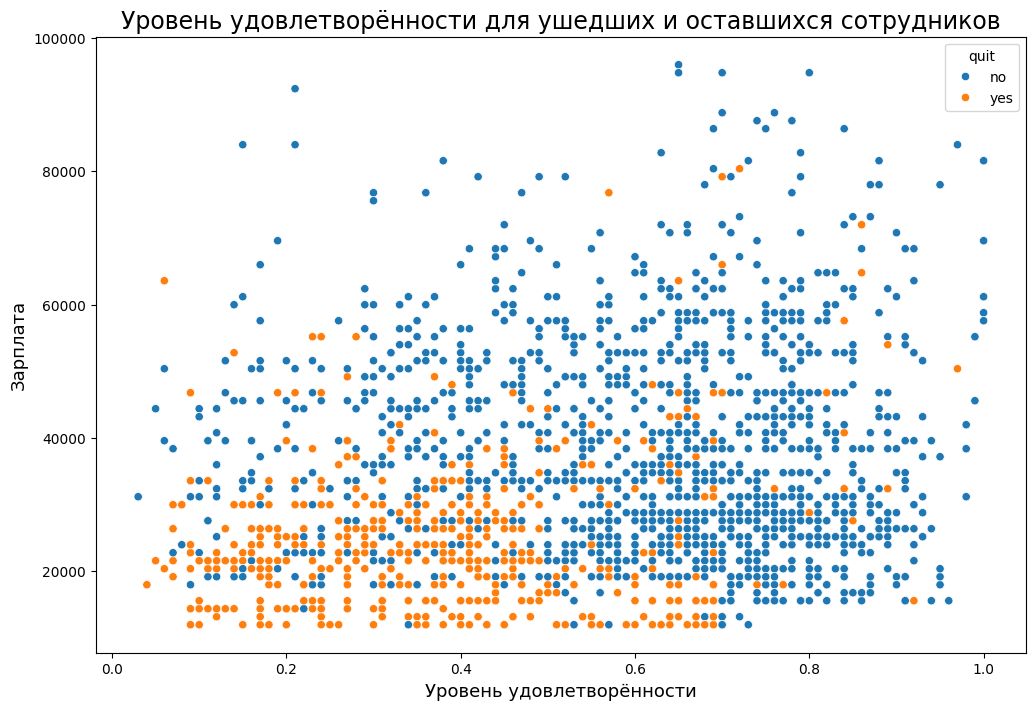

In [111]:
# Строим диаграмму рассеяния scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=features, x='job_satisfaction_rate', y='salary', hue='quit')
plt.title('Уровень удовлетворённости для ушедших и оставшихся сотрудников', fontsize=17)
plt.xlabel('Уровень удовлетворённости', fontsize=13)
plt.ylabel('Зарплата', fontsize=13)
plt.show()

Итак, на графике оранжевыми точками обозначены ушедшие сотрудники, а синими - оставшиеся. Для большинства ушедших сотрудников уровень удовлетворенности работой в компании находится в диапазоне от 0.1 до 0.5, тогда как для большинства оставшихся сотрудников наиболее характерен уровень удовлетворенности работой в компании в диапазоне от 0.5 до 0.9. Ушедших сотрудников, чей уровень удовлетворенности более 0.5 крайне мало. Своего рода данные признака `job_satisfaction_rate` являются вероятностными метками классов признака `quit`, который принимает два значения `yes` и `no`, а признак `job_satisfaction_rate` имеет непрерывные данные в диапазоне от `0` до `1`, на графике мы определили своего рода порог классификации, если уровень удовлетворенности (вероятность) `более 0.5`, то вероятнее всего сотрудник не уволится, и наоборот, если уровень удовлетворенности `менее 0.5`, то вероятность, что сотрудник уйдет возрастает. Можно сделать вывод, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Дополнительно мы данное утверждение аналитиков проверим при анализе важности признаков с помощью метода `SHAP`.

Для более статистически достоверной оценки проведем статистический теcт `ttest`. Проверим гипотезу о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник.

- **Нулевая гипотеза:** *Средний уровень удовлетворенности ушедших и оставшихся сотрудников равен.*
- **Альтернативная гипотеза:** *Средний уровень удовлетворенности оставшихся сотрудников выше, чем ушедших.*

Это гипотеза о равенстве средних двух генеральных совокупностей, для ее проверки воспользуемся методом `scipy.stats.ttest_ind`

In [112]:
# Сохраним в датасете quit_no данные оставшихся сотрудников
quit_no = features.query('quit == "no"')

quit_no.sample(5)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
100710,hr,senior,low,6,no,no,4,27600,0.68,no
100894,sales,middle,high,6,no,no,3,56400,0.49,no
807221,sales,junior,medium,3,no,yes,4,27600,0.63,no
959371,technology,middle,medium,7,no,no,4,40800,0.62,no
353377,marketing,senior,medium,8,no,no,3,60000,0.57,no


In [113]:
# Сохраним в датасете quit_yes данные уволившихся сотрудников
quit_yes = features.query('quit == "yes"')

quit_yes.sample(5)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
463604,technology,junior,low,2,no,no,3,18000,0.34,yes
963931,technology,middle,high,1,no,no,5,63600,0.65,yes
741156,purchasing,junior,medium,1,no,no,1,27600,0.40,yes
239466,technology,junior,medium,2,no,no,2,30000,0.41,yes
518340,hr,junior,low,5,no,no,3,15600,0.41,yes


In [114]:
# Зададим уровень статистической значимости
alpha = 0.05

# Используем метод st.ttest_ind для проверки гипотезы о равенстве среднего 
satisfaction_rate = st.ttest_ind(quit_no['job_satisfaction_rate'], quit_yes['job_satisfaction_rate'], alternative = 'greater')

print('p-значение:', satisfaction_rate.pvalue)

# Сравним полученный p-value и уровень значимости и выведем соответствующий результат
if satisfaction_rate.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средний уровень удовлетворённости оставшихся сотрудников выше уволившихся.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средний уровень удовлетворённости работой в компании оставшихся и уволившихся сотрудников равны')
    
print('Средний уровень удовлетворённости оставшихся сотрудников работой в компании:', quit_no['job_satisfaction_rate'].mean().round(2))
print('Средний уровень удовлетворённости уволившихся сотрудников работой в компании:', quit_yes['job_satisfaction_rate'].mean().round(2))

p-значение: 6.155610332585964e-105
Отвергаем нулевую гипотезу: средний уровень удовлетворённости оставшихся сотрудников выше уволившихся.
Средний уровень удовлетворённости оставшихся сотрудников работой в компании: 0.61
Средний уровень удовлетворённости уволившихся сотрудников работой в компании: 0.39


Итак, мы получили *p-значение 6.155610332585964e-105* **меньше** *заданного уровня значимости*, поэтому мы отвергли нулевую гипотезу. Есть основания говорить, что средний уровень удовлетворённости оставшихся сотрудников выше уволившихся. Тем самым мы подтвердили, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник.

Так как признаки `job_satisfaction_rate` и `quit` действительно связаны, добавим к входным признакам датасета `train_quit` новый признак `job_satisfaction_rate`, предсказанный нашей лучшей моделью из первой задачи.

In [115]:
# Получим предсказания уровня удовлетворённости сотрудника работой в компании
job_rate_predict = grid_search.predict(train_quit)

# Добавим предсказания к датасету train_quit
train_quit['job_satisfaction_rate'] = job_rate_predict

train_quit['job_satisfaction_rate'] = round(train_quit['job_satisfaction_rate'], 2)

train_quit.sample(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
864403,hr,junior,medium,1,no,no,4,22800,yes,0.54
570741,sales,junior,medium,1,no,no,3,20400,yes,0.17
750439,sales,junior,medium,5,no,no,4,24000,no,0.71


Новый входящий признак `job_satisfaction_rate` успешно добавлен к датасету `train_quit`. 

Аналогичным образом добавим новый признак `job_satisfaction_rate`, предсказанный нашей лучшей моделью из первой задачи для тестовой выборки `features`, чтобы модель имела возможность работать с новыми работниками без исторических данных, модель должна использовать признак на основе предсказаний.

In [116]:
# Удалим столбец 'job_satisfaction_rate' с реальными значениями
features = features.drop('job_satisfaction_rate', axis=1)

# Получим предсказания уровня удовлетворённости сотрудника работой в компании
job_rate_predict_test = grid_search.predict(X_test_rate)

# Добавим предсказания к датасету train_quit
features['job_satisfaction_rate'] = job_rate_predict_test

features['job_satisfaction_rate'] = round(features['job_satisfaction_rate'], 2)

train_quit.sample(3)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
205252,purchasing,senior,medium,3,no,no,3,45600,no,0.32
361397,technology,junior,low,2,no,yes,3,15600,yes,0.23
808249,marketing,middle,medium,5,no,yes,4,37200,no,0.50


Новый входящий признак `job_satisfaction_rate`, предсказанный нашей лучшей моделью из первой задачи успешно добавлен к датасету `features`.

#### Проведем исследовательский анализ данных датасета `target_quit`

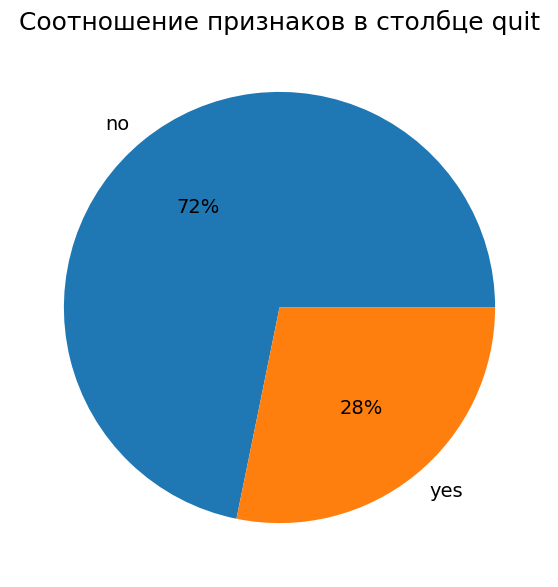

In [117]:
# Построим круговую диаграмму
object_pie(target_quit, 'quit')

Итак, в тестовой выборке целевой признак имеет следующее распределение: 72% сотрудников не уволились из компании, тогда как 28% сотрудников - уволились. У целевого признака мы наблюдаем дисбаланс классов (увольняющихся сотрудников гораздо меньше, чем тех, кто остаются в компании). Для подготовки целевого признака будем использовать кодировщик `LabelEncoder.`

#### Промежуточный вывод:

Мы провели исследовательский анализ данных датасета **`train_quit`**, который имеет идентичные столбцы (за исключением целевого признака) что и датасет `train_rate`, поэтому способы подготовки данных для моделей будут аналогичны. Данные распределены аналогично, что и в датасете `train_rate` с незначительными отклонениями.

Имеем портрет **«уволившегося сотрудника»**, данный сотрудник с наибольшей вероятностью:
- работает в отделе продаж `sales`
- занимает должность `junior` (младший специалист) 
- имеет низкую `low` или среднюю `medium` загрузку 
- работает только 1 год в компании
- не имеет повышения за последний год. 
- имеет оценку от руководителя `3`
- имеет среднюю зарплату 23 тыс., что на 14 тыс. меньше, чем у тех, кто продолжает работать в компании. 

С помощью статистического теста подтвердили высказывание аналитиков о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Для большинства ушедших сотрудников уровень удовлетворенности работой в компании находится в диапазоне от 0.1 до 0.5, тогда как для большинства оставшихся сотрудников наиболее характерен уровень удовлетворенности работой в компании в диапазоне от 0.5 до 0.9. Средний уровень удовлетворённости оставшихся сотрудников работой в компании: 0.61, а для уволившихся сотрудников: 0.39.

Добавили к входным признакам датасета `train_quit` новый признак `job_satisfaction_rate`, предсказанный нашей лучшей моделью из первой задачи.

<a id='eleven_id'></a>
### Корреляционный анализ

Построим матрицу **корреляции Фи**, она поможет нам найти взаимосвязь между категориальными и количественными признаками. 

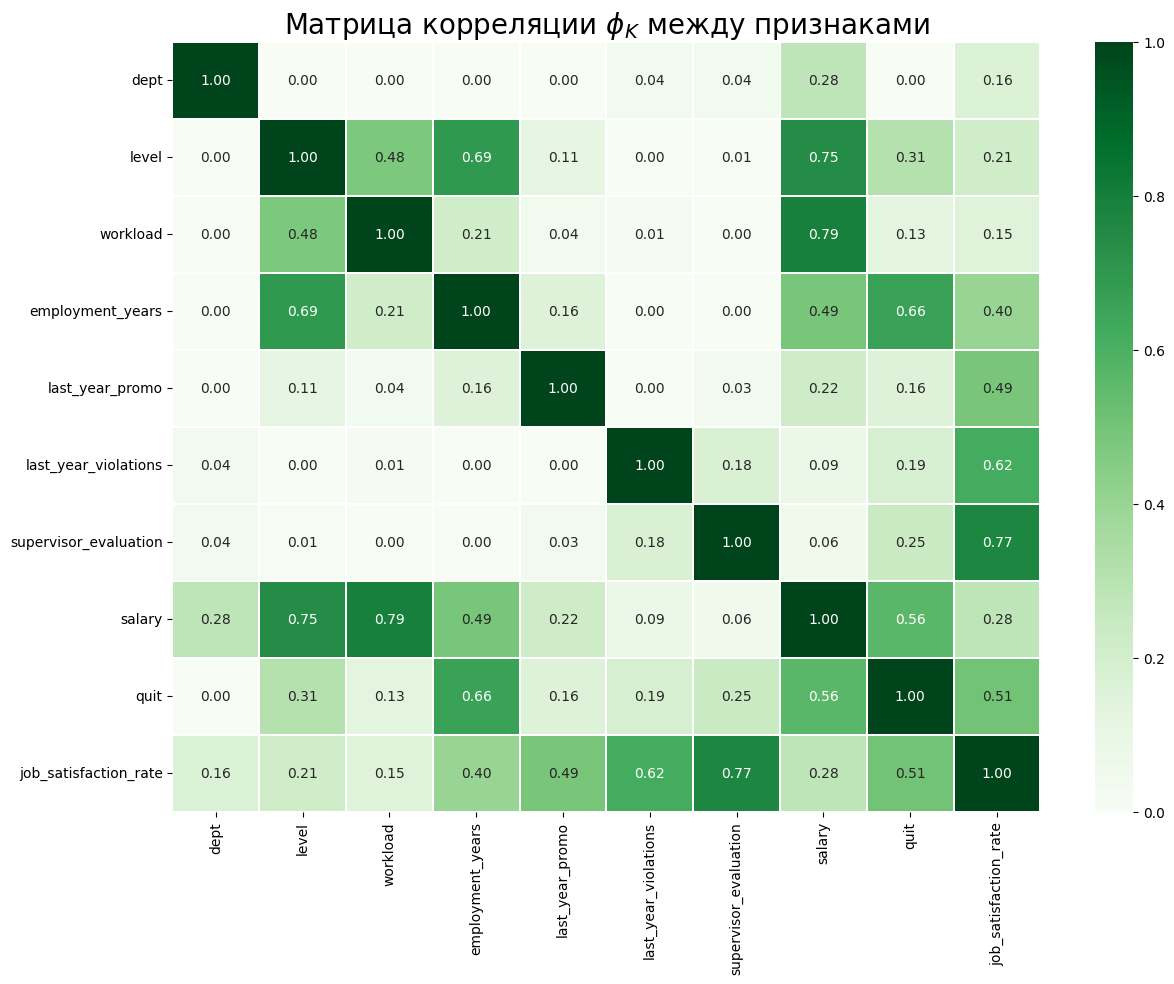

In [118]:
# Построим матрицу корреляции с помощью тепловой карты heatmap
# Непрерывные признаки train_quit аналогичны в переменной columns_num_cor 
plt.figure(figsize=(14, 10))
sns.heatmap(train_quit.phik_matrix(interval_cols=columns_num_cor), 
            annot=True, fmt='.2f', cmap='Greens', linewidths=0.01)
plt.title('Матрица корреляции $\phi_K$ между признаками', fontsize=20)
plt.show()

Темные тона говорят о сильной связи, а светлые — о слабой. Чем ближе значение к 1, тем сильнее связь. 

**С целевым признаком `quit`**:

*Сильную связь (Phik > 0.6)* имеют входные признаки:
- `employment_years` (коэф. 0.66) -  длительность работы в компании (в годах)

*Заметную связь (0.4 < Phik ≤ 0.6)* имеют входные признаки: 
- `salary` (коэф. 0.56) - ежемесячная зарплата сотрудника
- `job_satisfaction_rate` (коэф. 0.51) - уровень удовлетворённости сотрудника работой в компании

*Умеренную связь (0.2 < Phik ≤ 0.4)* имеют входные признаки:
- `level` (коэф. 0.31) - уровень занимаемой должности
- `supervisor_evaluation` (коэф. 0.25) - оценка качества работы сотрудника, которую дал руководитель

*Слабую связь (0 ≤ Phik ≤ 0.2)* имеют входные признаки:
- `last_year_violations` (коэф. 0.19) - показывает, нарушал ли сотрудник трудовой договор за последний год
- `last_year_promo` (коэф. 0.16) - показывает, было ли повышение за последний год
- `workload` (коэф. 0.13) - уровень загруженности сотрудника
- `dept` (коэф. 0.00) - отдел, в котором работает сотрудник


Мультикоррелирующих входных признаков не обнаружено.

Построим матрицу **корреляции Фи** для тестовой выборки `features`, т.к. мы добавляли в датасет новые признаки, проверим взаимосвязь между категориальными и количественными признаками. 

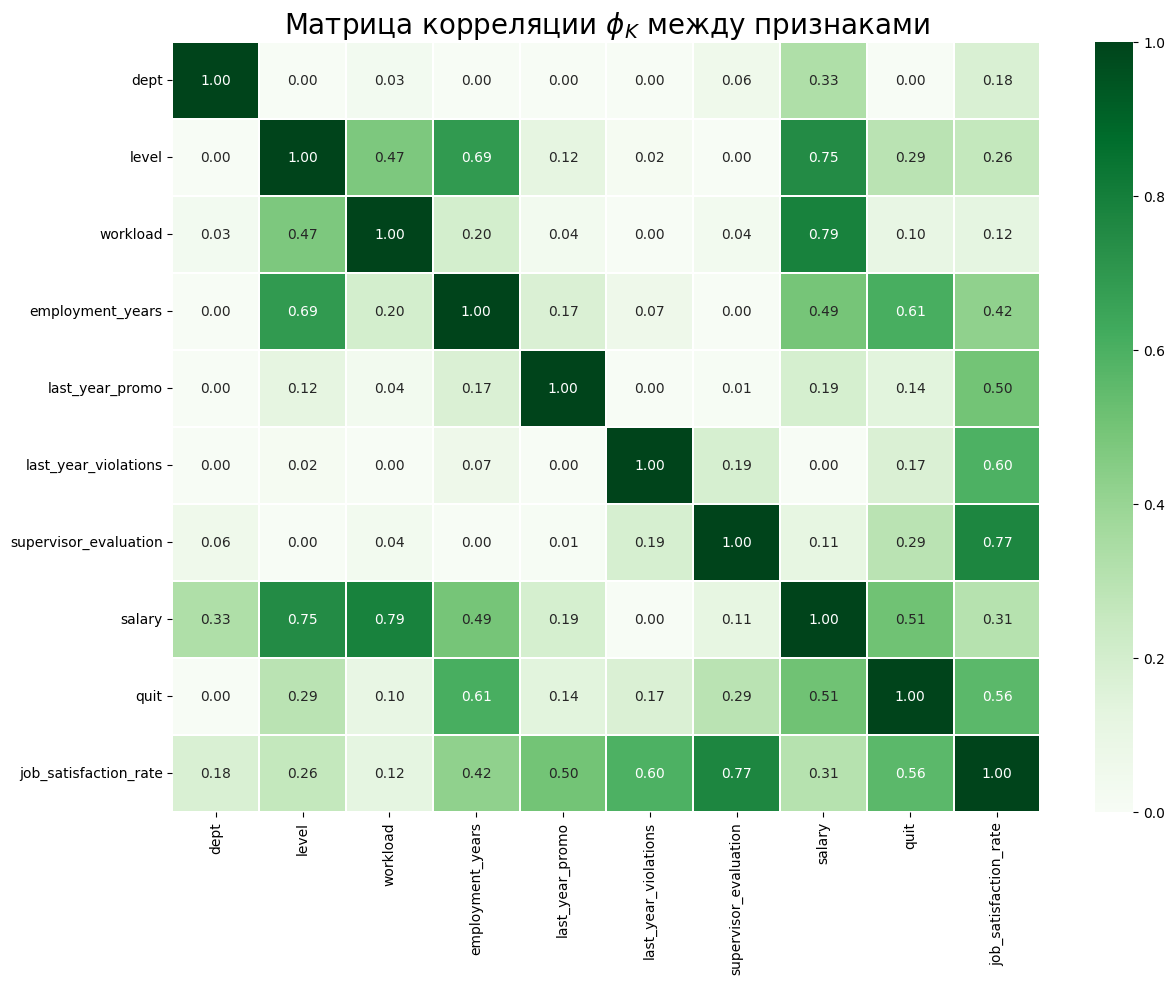

In [119]:
# Построим матрицу корреляции с помощью тепловой карты heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(features.phik_matrix(interval_cols=columns_num_cor), 
            annot=True, fmt='.2f', cmap='Greens', linewidths=0.1)
plt.title('Матрица корреляции $\phi_K$ между признаками', fontsize=20)
plt.show()

Итак, в тестовой выборке `features` входящие признаки корреляция признаков аналогична тренировочной выборки `train_quit`. Мультикоррелирующих входных признаков не обнаружено.

<a id='twelve_id'></a>
### Подготовка пайплайнов и выбор лучшей модели

Проверим датасет на наличие явных дубликатов повторно, после индекссации `id`.

In [120]:
# Проверим датасет на наличие явных дубликатов 
print(f'Кол-во явных дубликатов: {train_quit.duplicated().sum()}')

Кол-во явных дубликатов: 1413


Итак, после индексации столбца `id` у нас появились явные дубликаты. Очистим датасет от явных дубликатов, т.к. ценности для модели такие наблюдения не принесут.

In [121]:
# Удалим явные дубликаты
train_quit_copy = train_quit.drop_duplicates()

print(f'Кол-во явных дубликатов: {train_quit_copy.duplicated().sum()}')

Кол-во явных дубликатов: 0


Мы успешно очистили датасет от явных дубликатов.

Отделим целевой признак от обучающей и тестовой выборок.

In [122]:
# Сохраним обучающую выборку в переменную X_train_quit
X_train_quit = train_quit_copy.drop('quit', axis=1)

# Сохраним целевой признак обучающей выборки в переменную y_train_quit
y_train_quit = train_quit_copy['quit']

# Сохраним тестовую выборку в переменную X_test_quit
X_test_quit = features.drop(['quit'], axis=1)

# Сохраним целевой признак тестовой выборки в переменную y_test_quit
y_test_quit = features['quit']

Закодируем целевой признак методом `LabelEncoder.`

In [123]:
# Закодируем тренировочную и тестовую выборки с целевым признаком
label_encoder = LabelEncoder()

y_train_quit = label_encoder.fit_transform(y_train_quit)
y_test_quit = label_encoder.transform(y_test_quit) 

In [124]:
# Выведем отсортированные классы 
label_encoder.classes_

array(['no', 'yes'], dtype=object)

Итак, кодировщик закодировал значения целевого признака следующим образом: 
- `0` — `no` (сотрудник не уволится)
- `1` — `yes` (сотрудник уволится)

Так как у нас категориальные признаки остались неизменными, воспользуемся пайпланами `ohe_pipe` и `ord_pipe` для кодирования из первой задачи. Создадим только новый пайплайн для масштабирования количественных данных.

Создадим пайплайн `num_quit_pipe` для масштабирования данных.

In [125]:
# В переменную num_columns_quit запишем количественные признаки
num_columns_quit = [
    'employment_years', 'supervisor_evaluation', 
    'salary', 'job_satisfaction_rate'
]

In [126]:
# Создадим пайплайн num_quit_pipe для масштабирования данных.
num_quit_pipe = Pipeline(
    [
        ('simpleimputer_num', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-9999)), 
        ('num', StandardScaler())        
    ]
)

Создадим общий пайплайн для подготовки данных.

In [127]:
# Создадим общий пайплайн для подготовки данных
data_preprocessor_quit = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns), 
        ('ord', ord_pipe, ord_columns), 
        ('num', num_quit_pipe, num_columns_quit)        
    ], 
    remainder='passthrough'
)

Cоздадим итоговый пайплайн: подготовка данных и модель.

In [128]:
# Cоздадим итоговый пайплайн: подготовка данных и модель
pipe_final_quit = Pipeline(
    [
        ('preprocessor', data_preprocessor_quit), 
        ('models', DecisionTreeClassifier(random_state=42))        
    ]
)

Cоздадим список моделей с гиперпараметрами для `GridSearchCV`

In [129]:
# Cоздадим список моделей с гиперпараметрами
param_grid_quit = [
    # словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(random_state=42)], 
        'models__C': range(1, 7), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    # словарь для модели DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=42)], 
        'models__max_depth': range(3, 20), 
        'models__min_samples_leaf': range(1, 5), 
        'models__min_samples_split': range(1, 4), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }, 
    # словарь для модели KNeighborsClassifier
    {
        'models': [KNeighborsClassifier()], 
        'models__n_neighbors': range(1, 5), 
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    }
]

Подбор гиперпараметров будем проводить по сетке с помощью `GridSearchCV`, а для оценки качества модели будем использовать метрику `ROC-AUC`. Критерий успеха: `ROC-AUC ≥ 0.91` на тестовой выборке. 

In [130]:
# Используем GridSearchCV
grid_search_quit = GridSearchCV(
    pipe_final_quit, 
    param_grid_quit, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=-1
)

Обучим наши модели с гиперпараметрами и выведем лучшую модель и ее метрику.

In [131]:
# Обучаем модели
grid_search_quit.fit(X_train_quit, y_train_quit)

print('Лучшая модель и её параметры:', grid_search_quit.best_params_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', grid_search_quit.best_score_)

Лучшая модель и её параметры: {'models': LogisticRegression(random_state=42), 'models__C': 2, 'preprocessor__num': StandardScaler()}
Метрика ROC-AUC лучшей модели на кросс-валидации: 0.9058094361491993


Проверим работу лучшей модели на тестовой выборке.

In [132]:
# Сделаем предсказания лучшей моделью 
y_pred_quit = grid_search_quit.predict(X_test_quit)

# Получим предсказания меток старшего класса и выведем метрику
y_proba_quit = grid_search_quit.predict_proba(X_test_quit)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test_quit, y_proba_quit), 2)}')

Метрика ROC-AUC на тестовой выборке: 0.91


Итак, по итогам работы `GridSearchCV` мы получили лучшую модель `LogisticRegression(random_state=42, C = 2)`и методом масштабирования `StandardScaler()`. Метрика `ROC-AUC` на кросс-валидации составила 0.90 (что является хорошим показателем по условию задачи, значит модель имеет низкое смещение), на тестовых данных метрика `ROC-AUC` нашей лучшей модели улучшилась и составила 0.91, что говорит о низком разбросе модели. Метрика `ROC-AUC ≥ 0.91` на тестовой выборке, а значит модель успешно предсказала целевой признак.

Проверим нашу лучшую модель на адекватность, сравнив качество её предсказаний с качеством константной модели `DummyClassifier`.

In [133]:
# Обучим модель DummyClassifier
dummy_quit = DummyClassifier(random_state=42)

dummy_quit.fit(X_train_quit, y_train_quit)

# Выведем метрику ROC-AUC
y_dummy_quit_proba = dummy_quit.predict_proba(X_test_quit)[:, 1]

print('Метрика ROC-AUC константной модели на тестовой выборке:', round(
    roc_auc_score(y_test_quit, y_dummy_quit_proba), 2))

Метрика ROC-AUC константной модели на тестовой выборке: 0.5


Итак, мы получили метрику `ROC-AUC 0.91` нашей **лучшей модели** на тестовых данных и метрику `ROC-AUC 0.5` **константной модели**. Мы получили результат тестирования нашей лучшей модели на тествой выборке лучше, чем результат константной модели на 0.41.

#### Построим матрицу ошибок и рассчитаем метрики `recall` и `precision` для лучшей модели.

recall: 0.78
precision: 0.78


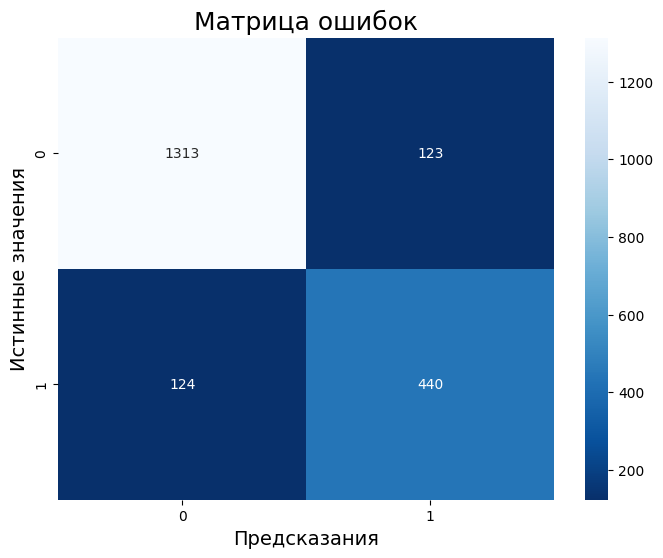

In [134]:
# Строим матрицу ошибок
cm = confusion_matrix(y_test_quit, y_pred_quit)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=18)
plt.ylabel('Истинные значения', fontsize=14)
plt.xlabel('Предсказания', fontsize=14)       

# Рассчитаем метрики 
print(f'recall: {round(recall_score(y_test_quit, y_pred_quit), 2)}')
print(f'precision: {round(precision_score(y_test_quit, y_pred_quit), 2)}')

По матрице ошибок наша лучшая модель имеет одинаковые метрики `precision = 0.78` и `recall = 0.78`. Так же модель допускает идентичное кол-во ошибок 1-го рода (123 ошибки), за ошибки данного рода отвечает метрика `precision` (чем выше данная метрика, тем меньше ошибок 1-го рода) и характеризует точность предсказаний модели, т. е. как часто модель предсказывает, что сотрудник уволился, хотя на самом деле он не уволился. Ошибок 2-го рода на тестовых данных - 124, за них отвечает метрика `recall` (чем выше данная метрика, тем меньше ошибок 2-го рода) и характеризует полноту предсказаний модели, т. е. как часто модель предсказывает, что сотрудник не уволился, хотя на самом деле он уволился. В зависимости от задач бизнеса, мы можем подтянуть одну из данных метрик, подобрав порог принадлежности к классам. 

#### Оценка важности признаков для лучшей модели

Построим график важности признаков для модели с помощью метода SHAP.

In [135]:
# С помощью пайплайна подготовим тестовую выборку для SHAP
X_shap_quit = pd.DataFrame(
    grid_search_quit.best_estimator_.named_steps['preprocessor'].transform(X_test_quit), 
    columns=grid_search_quit.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

In [136]:
# Рассчитаем SHAP
explainer_quit = shap.LinearExplainer(grid_search_quit.best_estimator_.named_steps['models'], X_shap_quit)

In [137]:
# Оценим значения SHAP для набора выборок
shap_values_quit = explainer_quit(X_shap_quit)

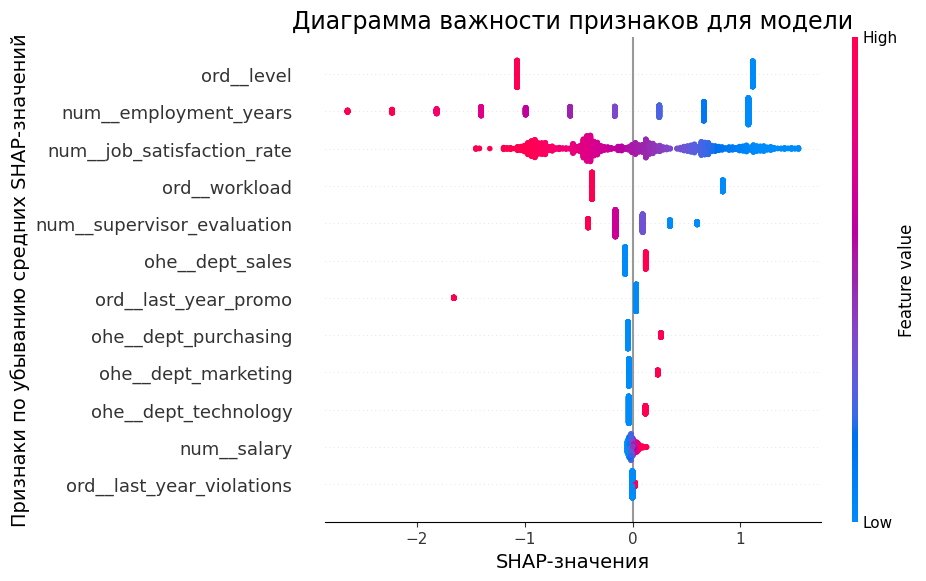

In [138]:
# Построим график shap
shap.plots.beeswarm(shap_values_quit, max_display=12, show=False) 

ax = plt.gca()
ax.set_ylabel("Признаки по убыванию средних SHAP‑значений", fontsize=14)
ax.set_xlabel("SHAP-значения", fontsize=14)
ax.set_title('Диаграмма важности признаков для модели', fontsize=17)
plt.show()

На графике точками отображены все наблюдения из выборки. На оси X отложены значения Шепли, на оси Y — признаки модели, расположенные сверху вниз в порядке убывания средних SHAP‑значений. 

**Значимые** для модели признаки, высокие значения (или наличие) которых **сохраняют** сотрудника в компании (SHAP-значения уменьшаются по мере роста значения признака):

- `ord__level` - при кодировании у нас был порядок должностей `'junior→middle→sinior'`, после кодирования порядок `0→1→2`, получается, чем выше занимает должность сотрудник, тем меньше вероятность, что он уволится.
- `num__employment_years` - чем дольше сотрудник работает в компании, тем меньше вероятность, что он уволится.
- `num__job_satisfaction_rate` - чем выше уровень удовлетворённости сотрудника работой в компании, тем меньше вероятность, что такой сотрудник уволится.
- `ord__workload` - более высокий уровень загруженности сотрудника увеличивает вероятность, что сотрудник не уволится.
- `num__supervisor_evaluation` - чем выше оценка качества работы сотрудника, которую дал руководитель, тем меньше вероятность, что сотрудник уволится.
- `ohe_dept_sales` - сотрудники отедла продаж `sales` наиболее склонны к увольнению.

Также, в случае если в вышеуказанных признаках значения становятся низкими, то вероятность того, что сотрудник уволится, растет.

#### Промежуточные выводы:

Итак, с помощью пайпланов и инструмента по подбору гиперпараметров `GridSearchCV` мы перебрали комбинации масштабирования данных методами `StandardScaler` и `MinMaxScaler` и гиперпараметры для 3-х моделей `LogisticRegression`, `DecisionTreeRegressor` и `KNeighborsClassifier`.


Получили лучшую модель `DecisionTreeRegressor(random_state=42, max_depth= 5, min_samples_leaf = 4, min_samples_split = 2)`и методом масштабирования `MinMaxScaler()`. Метрика `ROC-AUC` на тестовых данных составила 0.919. Критерий успеха: `ROC-AUC ≥ 0.91` на тестовой выборке, а значит наша модель успешно предсказывает целевой признак.

Проверили нашу лучшую модель на адекватность, получили метрику `ROC-AUC 0.92` нашей **лучшей модели** на тестовых данных и метрику `ROC-AUC 0.5` **константной модели**. Получили результат тестирования нашей лучшей модели на тестовой выборке лучше, чем результат константной модели на 0.42.

Построили матрицу ошибок и выяснили, что наша лучшая модель имеет хорошую полноту предсказаний (достаточно высокая метрика `recall = 0.86`) и допускает незначительное кол-во ошибок 2-го рода, (их у нас 77 на тестовой выборке), когда модель предсказала, что сотрудник не уволится, хотя на самом деле он уволится. 

Выявили **значимые** для модели признаки, высокие значения (или наличие) которых **сохраняют** сотрудника в компании (SHAP-значения уменьшаются по мере роста значения признака):

- `ord__level` - при кодировании у нас был порядок должностей `'junior→middle→sinior'`, после кодирования порядок `0→1→2`, получается, чем выше занимает должность сотрудник, тем меньше вероятность, что он уволится.
- `num__employment_years` - чем дольше сотрудник работает в компании, тем меньше вероятность, что он уволится.
- `num__job_satisfaction_rate` - чем выше уровень удовлетворённости сотрудника работой в компании, тем меньше вероятность, что такой сотрудник уволится.
- `ord__workload` - более высокий уровень загруженности сотрудника увеличивает вероятность, что сотрудник не уволится.
- `num__supervisor_evaluation` - чем выше оценка качества работы сотрудника, которую дал руководитель, тем меньше вероятность, что сотрудник уволится.
- `ohe_dept_sales` - сотрудники отедла продаж `sales` наиболее склонны к увольнению.

Также, в случае если в вышеуказанных признаках значения становятся низкими, то вероятность того, что сотрудник уволится, растет.

<a id='thirteen_id'></a>
## Общий вывод

### В первой задаче - `предсказание уровня удовлетворённости сотрудника` была проделана следующая работа:


**Проведена предобработка:**

- Столбец `id` преобразован в индексный. Столбцы с типом данных `object` привели к типу `category`. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`.

- В датасете `features` столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Пустые ячейки (строка с пробелом) в столбцах `dept` и `workload` заменены на `NaN`, чтобы в пайплайнах была возможность обработать эти пропуски. Пропуски заполнили в пайпланах самым часто встречающимся значением в соответствующих столбцах. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`.

- В датасете `target_rate` столбец `id` преобразован в индексный. Целевой признак `job_satisfaction_rate` имеет непрерывные данные, это задача регрессии.

**Проведен исследовательский анализ данных:**

1. Датасета **`train_rate`** и выявили следующее:

    - Самые многочисленные отелы это `sales` (отдел продаж) - 38% сотрудников работает в данном отделе и отдел `technology` (технологический отдел) - 22%.
    - Самая многочисленная должность `junior` (младший специалист) - 47% сотрудников находятся в соответствующей должности и должность `middle` (специалист среднего уровня) - 44%.
    - Наибольшее число сотрудников имеют уровень загруженности `medium` (средняя) - 52%
    - Наибольшее число сотрудников работает 1 год в компании, так же довольно многочисленны сотрудники, работающие 2 года. 
    - У 97% сотрудников не было повышения за последний год
    - 86% сотрудников не нарушали трудовой договор за последний год, тогда как у 14% были эти нарушения. 
    - Наибольшее число сотрудников получило от руководителя оценку `4`
    - Наибольшее число сотрудников имеет зарплату от 25 до 30 тыс. Средняя зарплата составляет 34 тыс. 
    - Наибольшее число сотрудников имеют уровень удовлетворенности работой в компании от 0.6 до 0.7. Средний уровень удовлетворенности составляет 0.53. 


2. Датасета **`features`**, который имеет идентичные столбцы (за исключением целевого признака) что и датасет `train_rate`, их данные распределены аналогично, что и в датасете `train_rate` с незначительными отклонениями.


3. Датасета **`target_rate`** и выяснили, что наибольшее число сотрудников имеют уровень удовлетворенности работой в компании от 0.6 до 0.8. Средний уровень удовлетворенности составляет 0.55.

**Для поиска лучшей модели была проведена следующая работа:**

1. В ходе исследовательского анализа данных был определен способ подготовки данных для каждого признака:
    - Кодирование методом `OneHotEncoder` признаков в столбце: `dept`
    - Кодирование методом `OrdinalEncoder` признаков в столбцах: `level`, `workload`, `last_year_promo`, `last_year_violations`, `supervisor_evaluation`
    - Масштабирование одним из методов (`StandardScaler` или `MinMaxScaler`) признаков в столбцах: `employment_years`, `salary`.


2. Провели корреляционный анализ помощью матрицы корреляции Фи, мультикоррелирующих входных признаков не обнаружено.


3. После индексации `id` очистили тренировочную выборку от явных дубликатов.


4. С помощью пайпланов и инструмента по подбору гиперпараметров `GridSearchCV` мы перебрали комбинации масштабирования данных методами `StandardScaler` и `MinMaxScaler` и гиперпараметры для 2-х моделей `DecisionTreeRegressor` и `LinearRegression`.


5. Получили лучшую модель `DecisionTreeRegressor(random_state=42, max_depth= 16, min_samples_leaf = 3, min_samples_split = 2)`и методом масштабирования `MinMaxScaler()`. Метрика `SMAPE` на тестовых составила 13.57. Критерий успеха: SMAPE ≤ 15 на тестовой выборке.


6. Проверили нашу лучшую модель на адекватность, получили метрику `SMAPE = 13.57` нашей **лучшей модели** на тестовых данных и метрику `SMAPE = 38.26` **константной модели**. Получили результат тестирования нашей лучшей модели на тестовой выборке лучше, чем результат константной модели на 24.69.


7. Выявили значимые для модели признаки и разбили их на две категории:

- *Признаки, более высокие значения которых соответствуют более высоким спрогнозированным значениям:*
     - `num__supervisor_evaluation` - чем выше оценка качества работы сотрудника, которую дал руководитель, тем более высокий уровень удовлетворённости сотрудника работой в компании.
     - `num__employment_years` - чем дольше сотрудник работает в компании, тем более высокий уровень удовлетворённости сотрудника работой в компании.
     - `num__salary` - более высокие ежемесячные зарплаты сотрудников соответствуют более высоким уровням удовлетворённости работой в компании.


- *Признаки, более высокие значения которых связаны с более низкими спрогнозированными значениями:*
     - `ord__level` - чем выше занимает должность сотрудник, тем меньше он может быть удовлетворен работой в компании. 
     - `ord__last_year_violations` - если сотрудник нарушал трудовой договор за последний год, то это увеличивает шанс низкого значения уровня удовлетворённости сотрудника работой в компании.


### Во второй задаче - `предсказание увольнения сотрудника из компании` была проделана следующая работа:



**Проведена предобработка:**

- В датасете `train_quit` столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. В столбце `level` исправили грамматическую ошибку заменили `sinior` на `senior`.

- В датасете `target_quit` столбец `id` преобразован в индексный, а столбцы с типом данных `object` привели к типу `category`. Целевой признак `quit` содержит два уникальных значения `no` и `yes`, это задача бинарной классификации.


**Проведен исследовательский анализ данных:**

1. Датасета **`train_quit`**, который имеет идентичные столбцы (за исключением целевого признака) что и датасет `train_rate`, их данные распределены аналогично, что и в датасете `train_rate` с незначительными отклонениями.


2. Построили портрет *«уволившегося сотрудника»*, данный сотрудник с наибольшей вероятностью:

   - работает в отделе продаж `sales`
   - занимает должность `junior` (младший специалист) 
   - имеет низкую `low` или среднюю `medium` загрузку 
   - работает только 1 год в компании
   - не имеет повышения за последний год. 
   - имеет оценку от руководителя `3`
   - имеет среднюю зарплату 23 тыс., что на 14 тыс. меньше, чем у тех, кто продолжает работать в компании. 
   

   
3. С помощью статистического теста подтвердили высказывание аналитиков о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Для большинства ушедших сотрудников уровень удовлетворенности работой в компании находится в диапазоне от 0.1 до 0.5, тогда как для большинства оставшихся сотрудников наиболее характерен уровень удовлетворенности работой в компании в диапазоне от 0.5 до 0.9. Средний уровень удовлетворённости оставшихся сотрудников работой в компании: 0.61, а для уволившихся сотрудников: 0.39.


**Для поиска лучшей модели была проведена следующая работа:**

1. Добавили к входным признакам датасета `train_quit` новый признак `job_satisfaction_rate`, предсказанный нашей лучшей моделью из первой задачи.


2. Провели корреляционный анализ помощью матрицы корреляции Фи, мультикоррелирующих входных признаков не обнаружено.


3. После индексации `id` очистили тренировочную выборку от явных дубликатов.


4. С помощью пайпланов и инструмента по подбору гиперпараметров `GridSearchCV` перебрали комбинации масштабирования данных методами `StandardScaler` и `MinMaxScaler` и гиперпараметры для 3-х моделей `LogisticRegression`, `DecisionTreeRegressor` и `KNeighborsClassifier`.


5. Получили лучшую модель `LogisticRegression(random_state=42, C = 2)`и методом масштабирования `StandardScaler()`. Метрика `ROC-AUC` на тестовых данных составила 0.91 (критерий успеха: `ROC-AUC ≥ 0.91` на тестовой выборке) 


6. Проверили нашу лучшую модель на адекватность, получили метрику `ROC-AUC 0.91 лучшей модели` на тестовых данных и метрику `ROC-AUC 0.5 константной модели`. Получили результат тестирования нашей лучшей модели на тестовой выборке лучше, чем результат константной модели на 0.41.


7. Построили матрицу ошибок и выяснили, наша лучшая модель имеет одинаковые метрики `precision = 0.78` и `recall = 0.78` и допускает идентичное кол-во ошибок 1-го рода (123 ошибки), т. е. как часто модель предсказывает, что сотрудник уволился, хотя на самом деле он не уволился и ошибок 2-го рода (124 ошибки), т. е. как часто модель предсказывает, что сотрудник не уволился, хотя на самом деле он уволился. 


8. Выявили значимые для модели признаки, высокие значения (или наличие) которых *сохраняют* сотрудника в компании (SHAP-значения уменьшаются по мере роста значения признака):

     - `ord__level` - при кодировании у нас был порядок должностей `'junior→middle→sinior'`, после кодирования порядок `0→1→2`, получается, чем выше занимает должность сотрудник, тем меньше вероятность, что он уволится.
     - `num__employment_years` - чем дольше сотрудник работает в компании, тем меньше вероятность, что он уволится.
     - `num__job_satisfaction_rate` - чем выше уровень удовлетворённости сотрудника работой в компании, тем меньше вероятность, что такой сотрудник уволится.
     - `ord__workload` - более высокий уровень загруженности сотрудника увеличивает вероятность, что сотрудник не уволится.
     - `num__supervisor_evaluation` - чем выше оценка качества работы сотрудника, которую дал руководитель, тем меньше вероятность, что сотрудник уволится.
     - `ohe_dept_sales` - сотрудники отедла продаж `sales` наиболее склонны к увольнению.

   Также, в случае если в вышеуказанных признаках значения становятся низкими, то вероятность того, что сотрудник уволится, растет.


### Дополнительные предложения для бизнеса:

1. Вместо использования форм обратной связи и последующего расчета уровня удовлетворённости сотрудника работой в компании компания может использовать нашу модель регрессии `DecisionTreeRegressor(random_state=42, max_depth= 16, min_samples_leaf = 3, min_samples_split = 2)`и методом масштабирования `MinMaxScaler()`. На основе предсказаний данной моделью можно сделать предсказания увольнения сотрудника из компании нашей всторой моделью бинарной классификации `LogisticRegression(random_state=42, C = 2)`и методом масштабирования `StandardScaler()`.


2. Отделу HR и аналитикам следует присмотреться к сотрудникам, которые имеют портрет «уволившегося сотрудника», который мы описали выше. Совместно с предсказаниями моделей и портретом «уволившегося сотрудника» можно более точно определять таких сотрудников. 


3. Обращать внимание на уровень удовлетворенности работой в компании у сотрудников, имеющих высокие должности, так как в ходе интерпретации работы модели мы выяснили, что чем выше занимает должность сотрудник, тем меньше он может быть удовлетворен работой в компании. Низкий уровень удовлетворенности работой в компании увеличивает шанс на увольнение. Поэтому важно обращать внимание низкий уровень удовлетворенности работой в компании у сотрудников высоких должностей. 